In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install missingno
#visualize and analyze missing data in a dataset
import missingno as msno
import wordcloud
#from pandas_profiling import ProfileReport

# optional: set a larger figure size for matplotlib plots
plt.rcParams['figure.figsize'] = [12, 8]


In [ ]:
!unrar x "SampleSuperstore.rar"



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from SampleSuperstore.rar


Would you like to replace the existing file SampleSuperstore.csv
1113007 bytes, modified on 2024-01-29 07:22
with a new one
1113007 bytes, modified on 2024-01-29 07:22

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit y

Extracting  SampleSuperstore.csv                                         100%  OK 
All OK


In [ ]:
df = pd.read_csv("SampleSuperstore.csv")
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.isna().sum()

,0
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [ ]:
# descibe of categories

df.describe(include=['object']).T

,count,unique,top,freq
Ship Mode,9994,4,Standard Class,5968
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001
Region,9994,4,West,3203
Category,9994,3,Office Supplies,6026
Sub-Category,9994,17,Binders,1523


Category: Furniture
Sub-Category
Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: count, dtype: int64


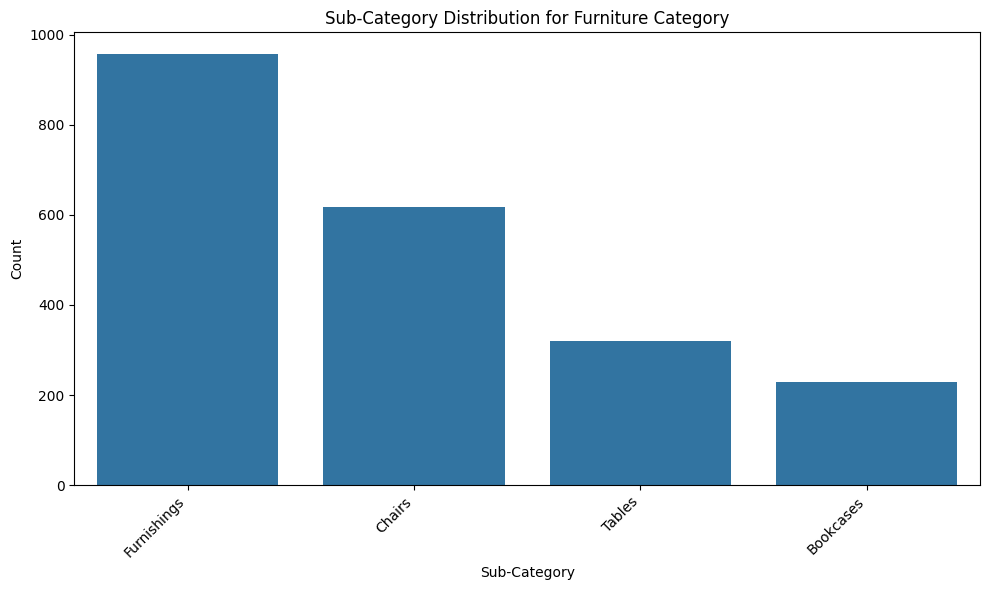

---------------------------------------------------------------------------
Category: Office Supplies
Sub-Category
Binders       1523
Paper         1370
Storage        846
Art            796
Appliances     466
Labels         364
Envelopes      254
Fasteners      217
Supplies       190
Name: count, dtype: int64


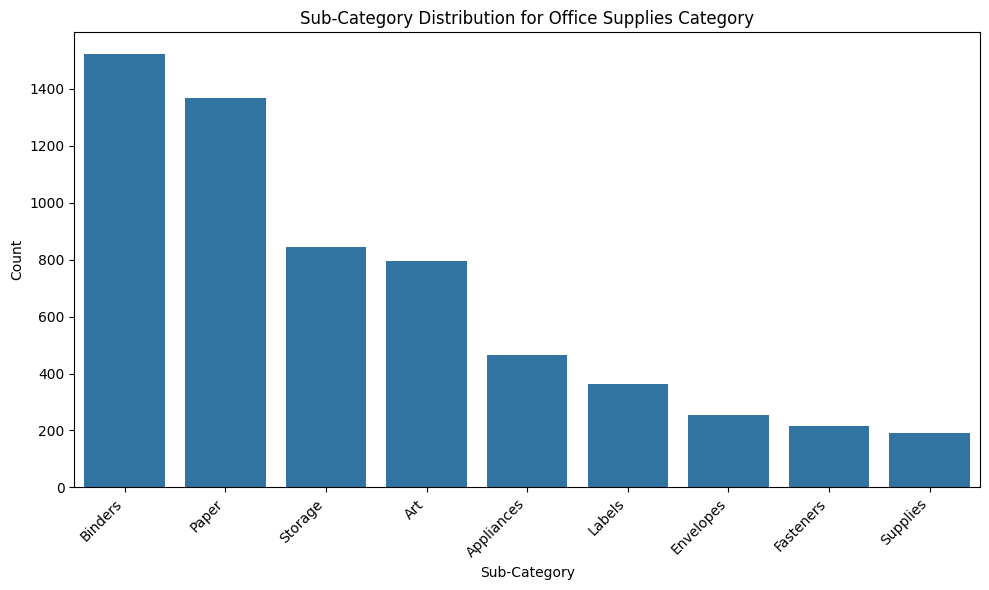

---------------------------------------------------------------------------
Category: Technology
Sub-Category
Phones         889
Accessories    775
Machines       115
Copiers         68
Name: count, dtype: int64


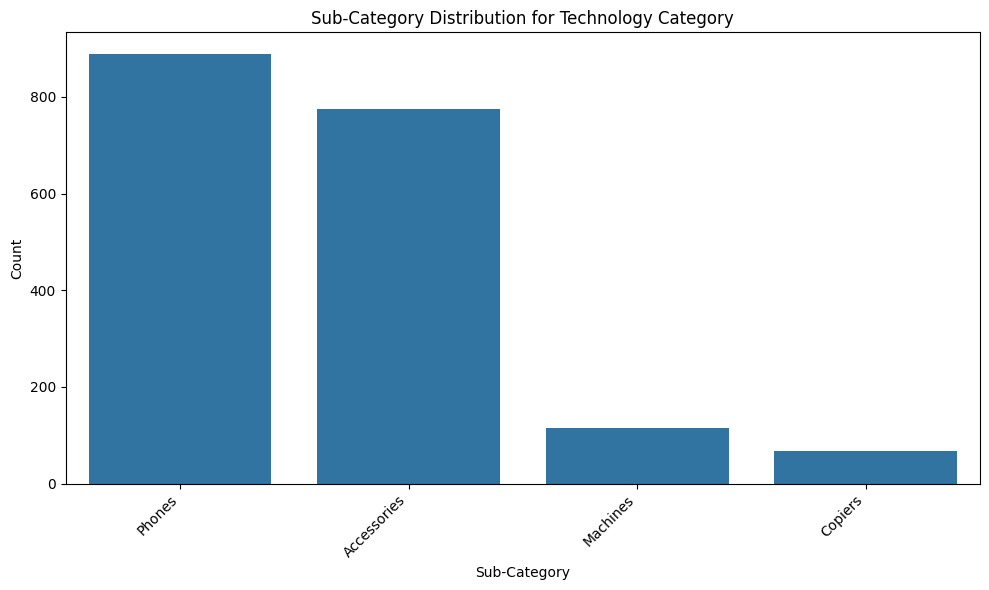

---------------------------------------------------------------------------


In [ ]:
# show the sub-categories for each category and the count of each one

for category in df['Category'].unique():
    print(f"Category: {category}")
    sub_categories = df[df['Category'] == category]['Sub-Category'].value_counts()
    print(sub_categories)

    # Visualization: Bar plot for each category
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.barplot(x=sub_categories.index, y=sub_categories.values)
    plt.title(f'Sub-Category Distribution for {category} Category')
    plt.xlabel('Sub-Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout() # prevent labels from overlapping
    plt.show()

    print("---------------------------------------------------------------------------")

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Column: {col}")
    print(df[col].nunique())
    print("---------------------------------------------------------------------------")
    print(df[col].value_counts(normalize=True) * 100)
    print("---------------------------------------------------------------------------  end")


Column: Ship Mode
4
---------------------------------------------------------------------------
Ship Mode
Standard Class    59.715829
Second Class      19.461677
First Class       15.389234
Same Day           5.433260
Name: proportion, dtype: float64
---------------------------------------------------------------------------  end
Column: Segment
3
---------------------------------------------------------------------------
Segment
Consumer       51.941165
Corporate      30.218131
Home Office    17.840704
Name: proportion, dtype: float64
---------------------------------------------------------------------------  end
Column: Country
1
---------------------------------------------------------------------------
Country
United States    100.0
Name: proportion, dtype: float64
---------------------------------------------------------------------------  end
Column: City
531
---------------------------------------------------------------------------
City
New York City      9.155493
Los Angeles 

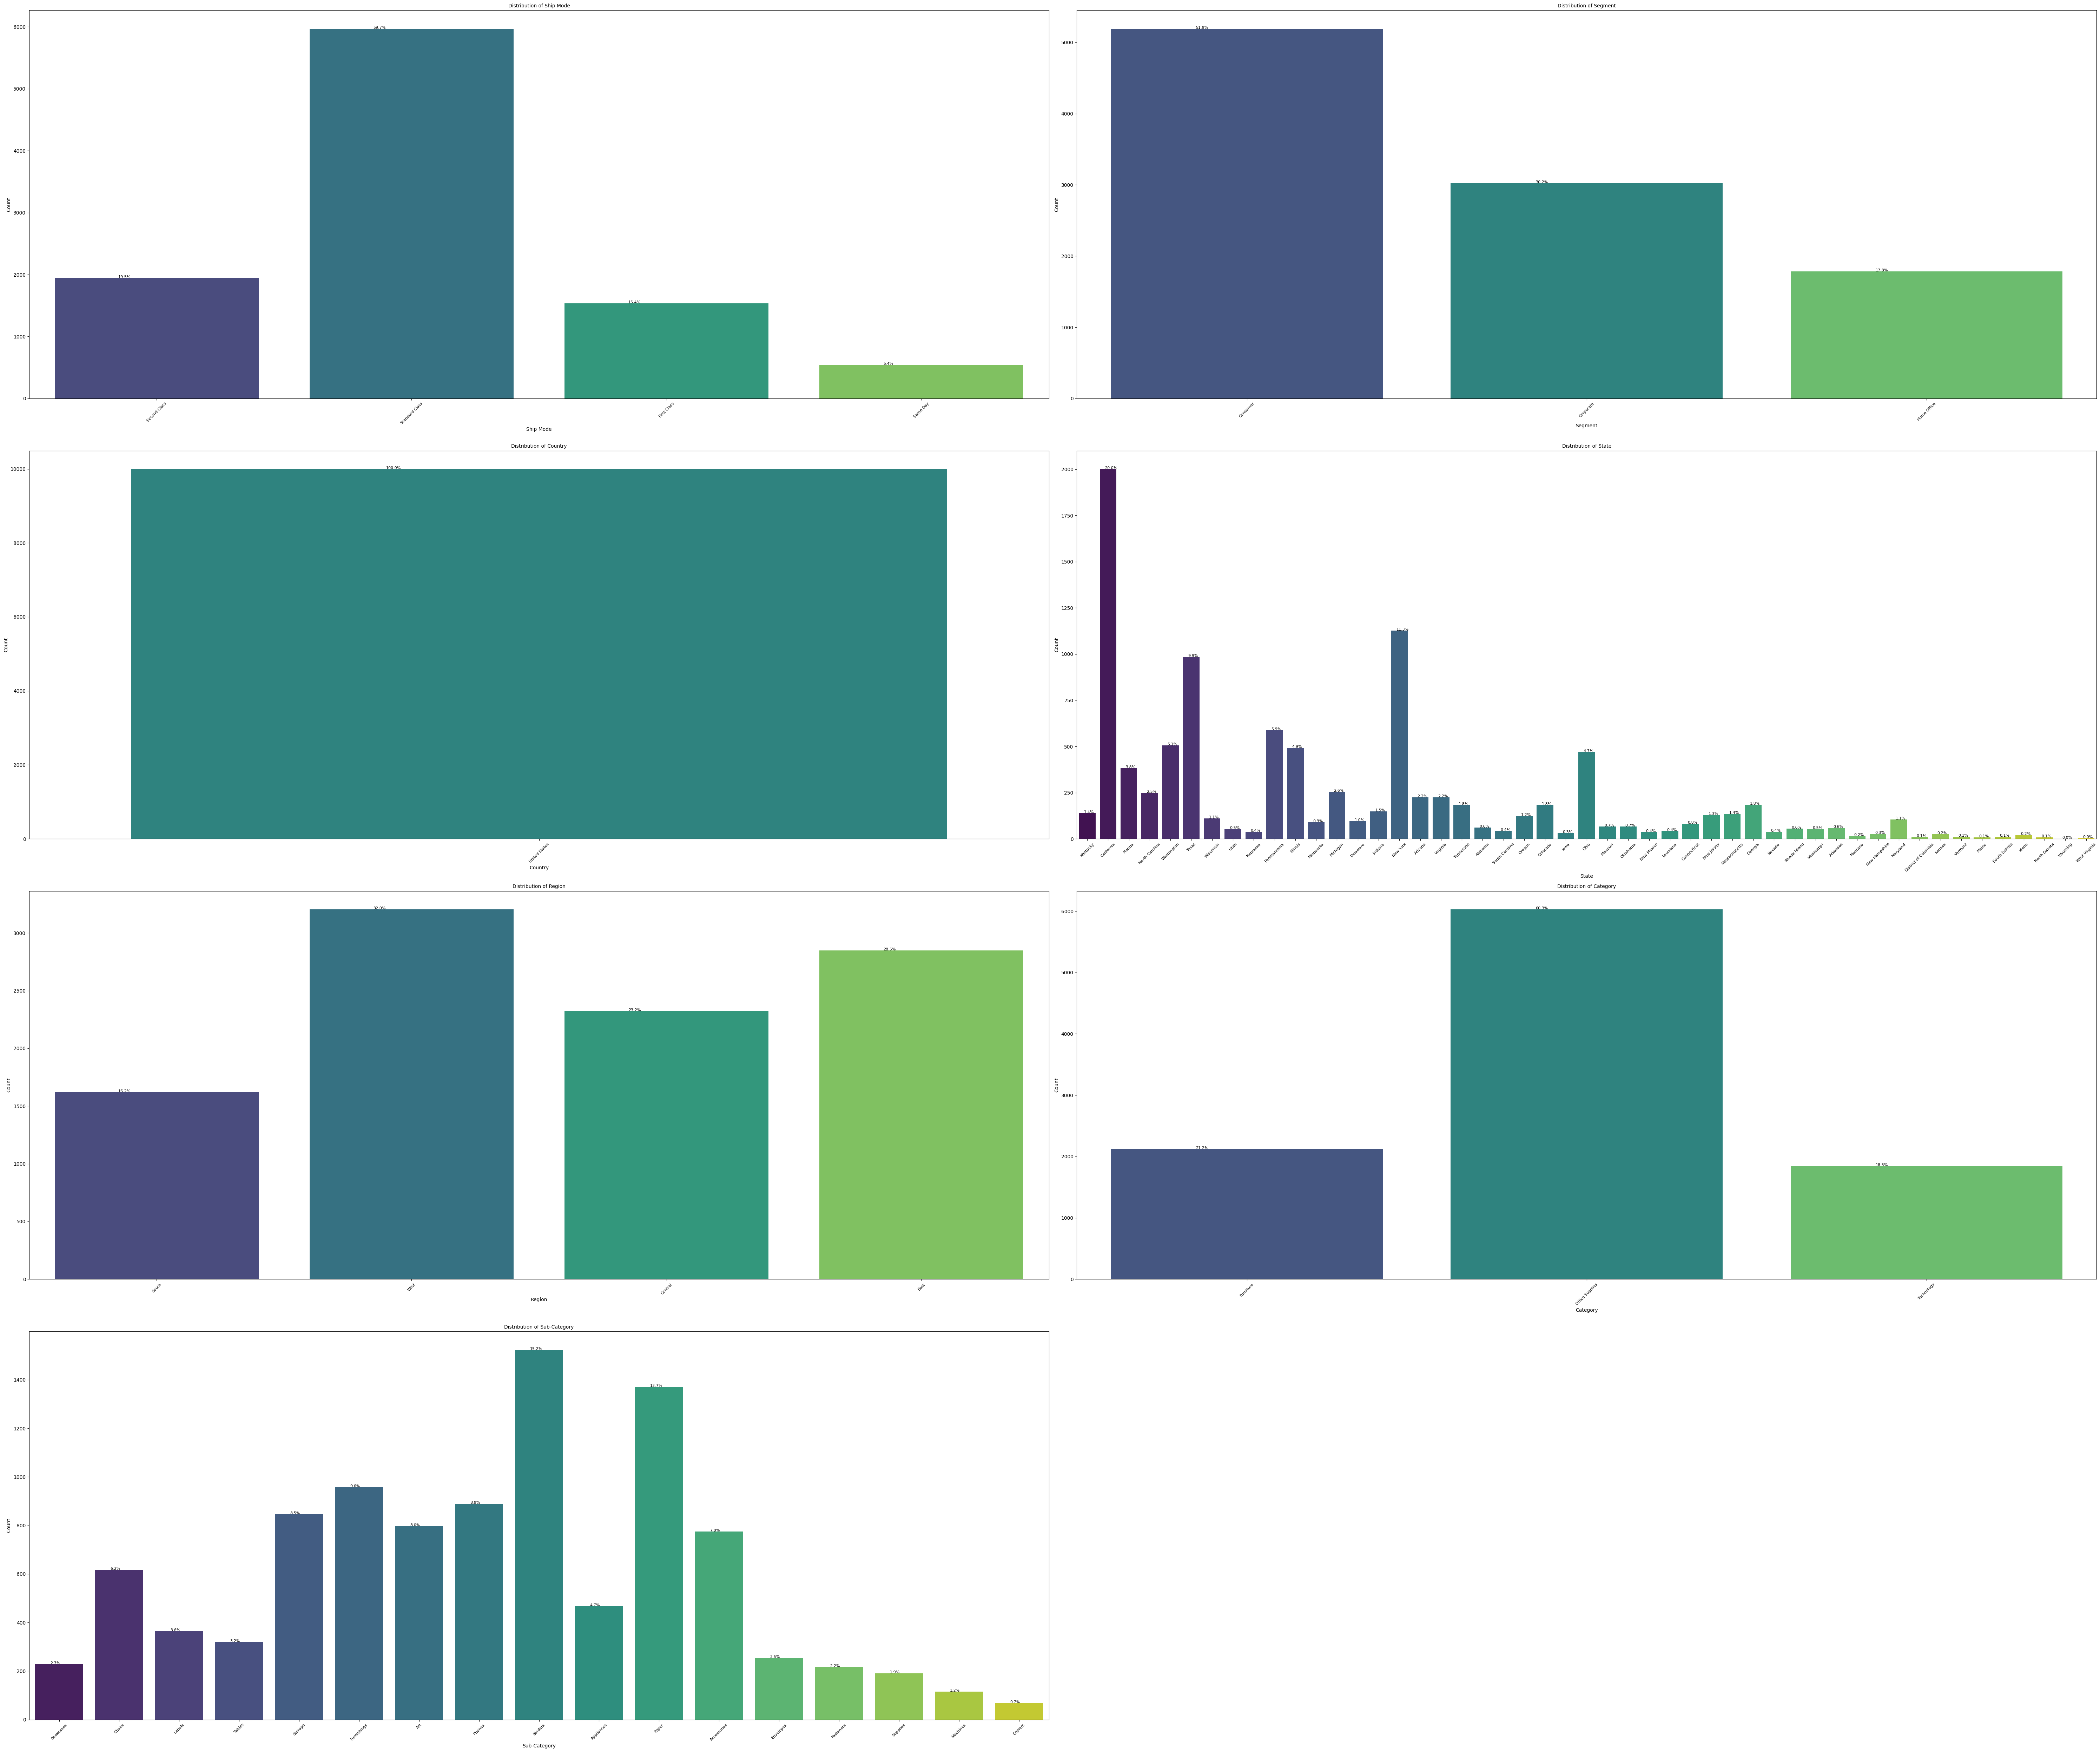

In [ ]:
# distriburion of categorical columns visualiztion with colors in subplots


categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop('City')


# Number of rows and columns for subplots
num_rows = 4  # Adjust as needed
num_cols = 2  # Adjust as needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 50))  # Adjust figure size

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    if i < num_rows * num_cols:  # Check if we're within the subplot limits
        ax = axes[i]
        sns.countplot(x=col, data=df, ax=ax, hue=col, palette="viridis", legend=False)
        ax.set_title(f'Distribution of {col}', fontsize=10)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45, labelsize=8) #adjust label size and rotation

        # Add percentage labels to the bars
        total = len(df[col])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() / 2 - 0.15  # Adjust position for better alignment
            y = p.get_y() + p.get_height()
            ax.annotate(percentage, (x, y), fontsize=8)

    else:
        break # stop if we exceed the number of subplots

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

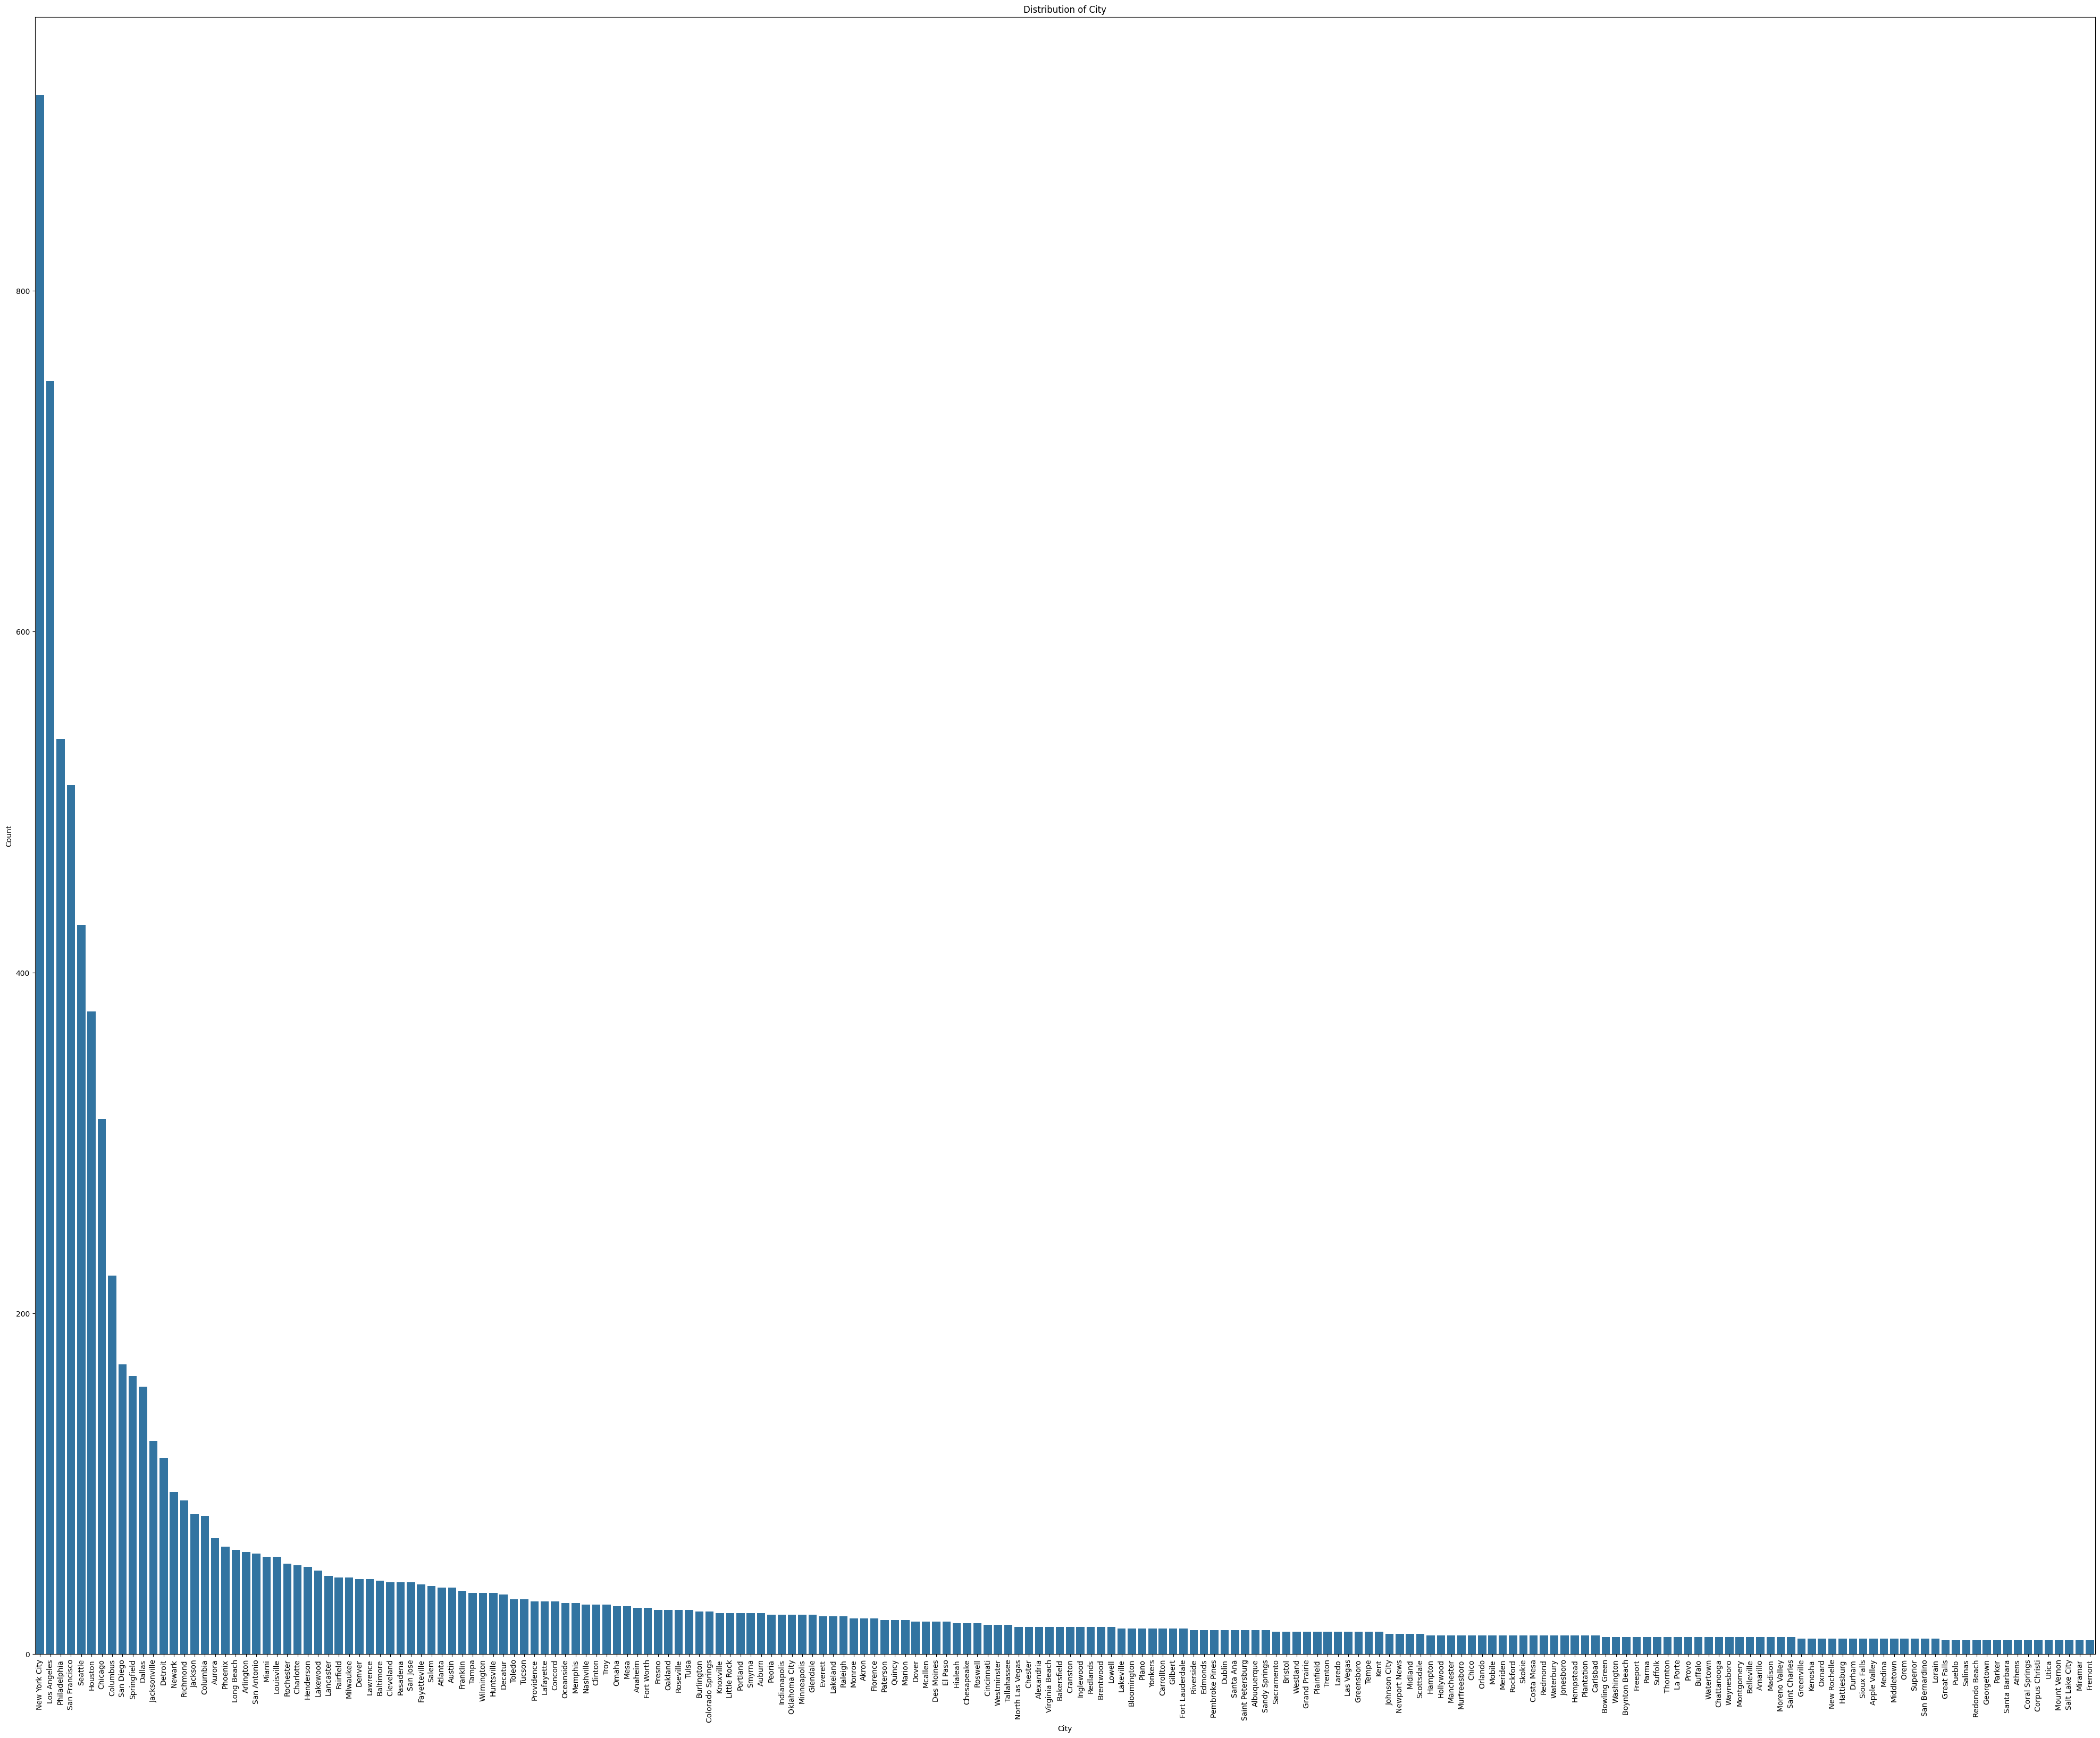

In [ ]:

# City distribution visualization
plt.figure(figsize=(50, 40))
sns.countplot(x='City', data=df, order=df['City'].value_counts().head(200).index)
plt.xticks(rotation=90)
plt.title('Distribution of City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

distribution analysis
Which categories are most/least frequent?
What is the range and central tendency of numerical columns?
Are there outliers in numerical data?

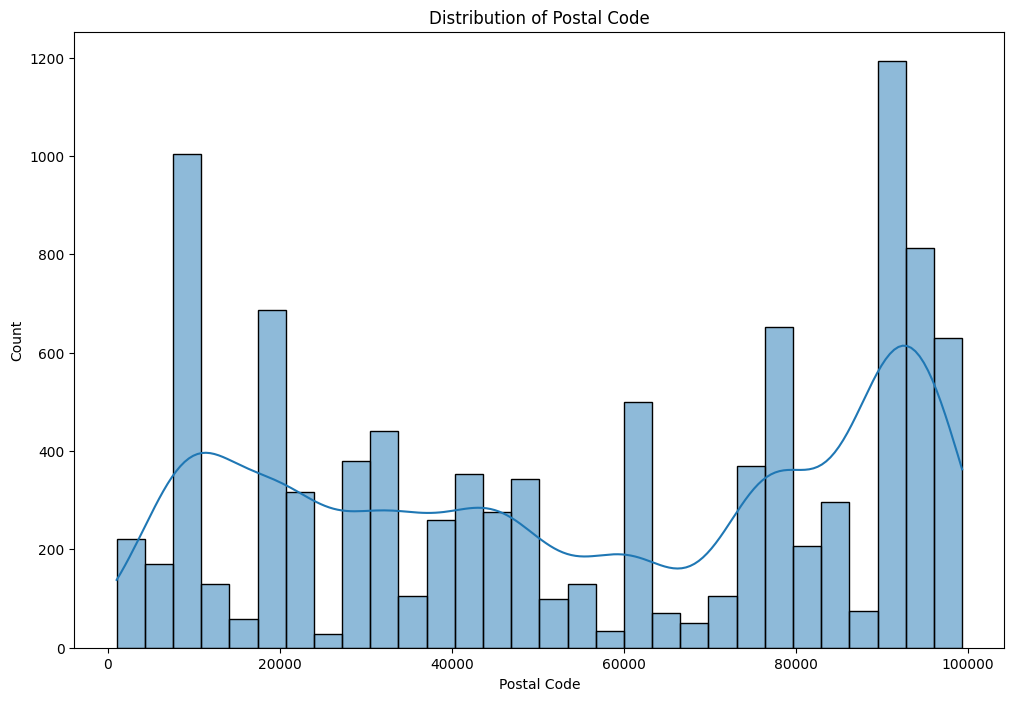

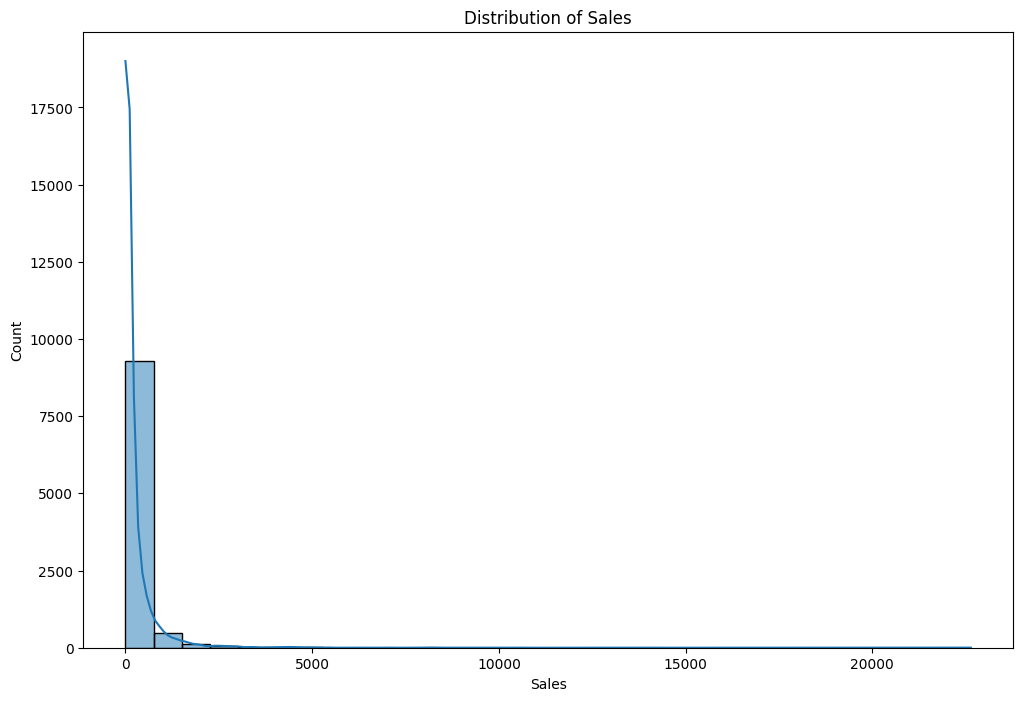

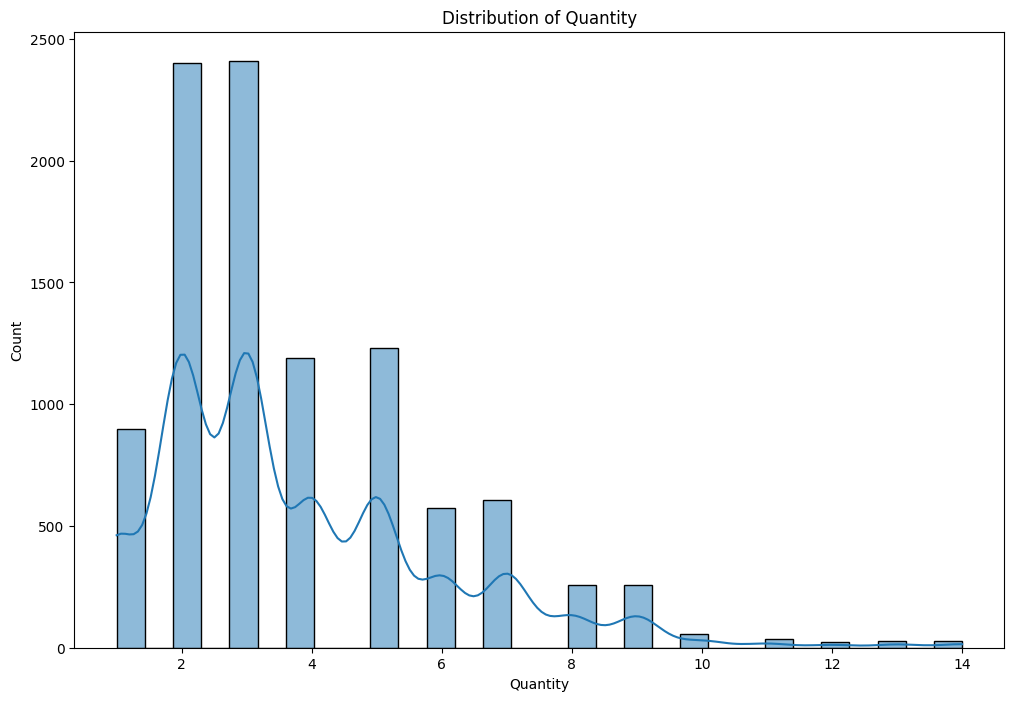

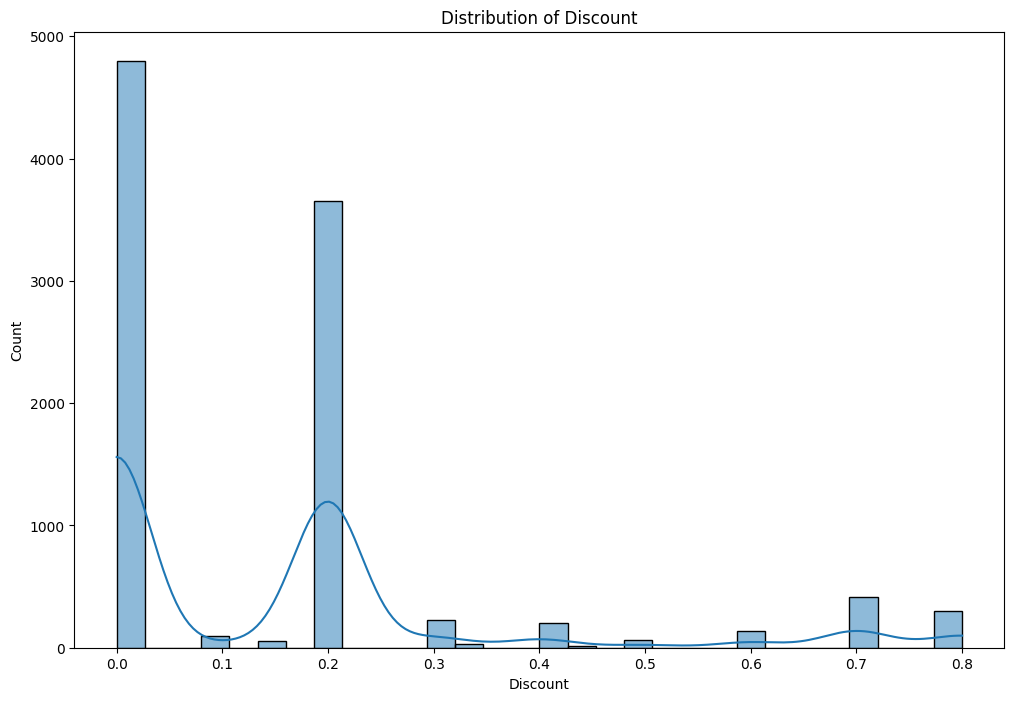

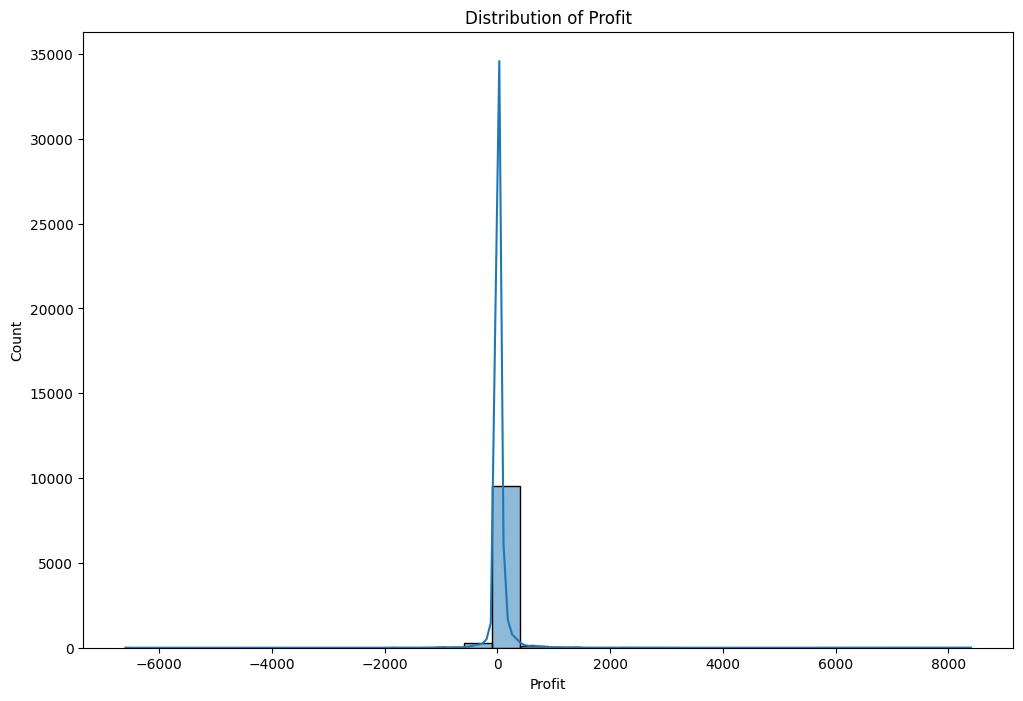

In [ ]:

# Visualize distributions
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


relation between columns & profit

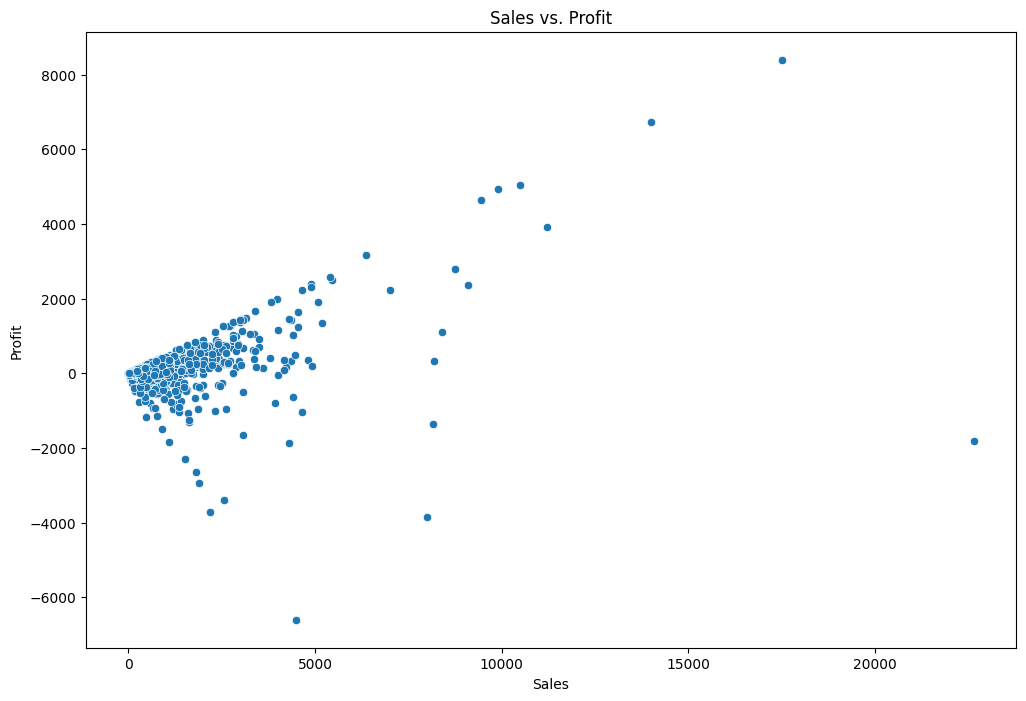

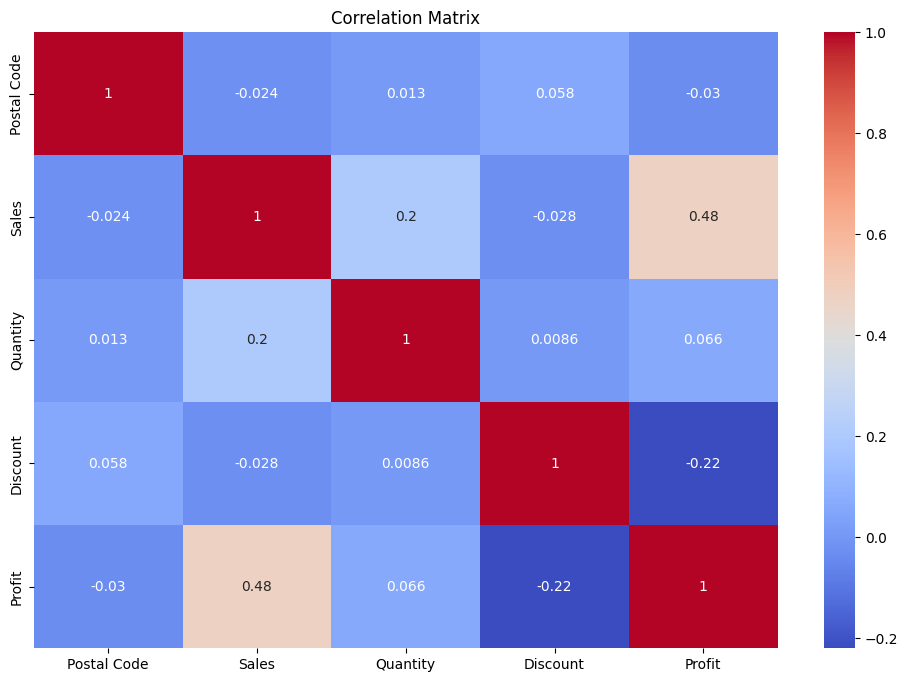

In [ ]:
# Scatter plot for Sales vs. Profit
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs. Profit')
plt.show()

# Correlation matrix
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# answer these questions Which segments or categories generate the most sales and profits?
# Is there a relationship between Discount and Profit?
#Which sub-categories have the highest profit maonergins? done
# Do higher sales always lead to higher profits?

# Segment analysis for sales and profit
segment_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
segment_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

print("Sales by Sub-Category:\n", segment_sales)
print("\nProfit by Sub-Category:\n", segment_profit)



Sales by Sub-Category:
 Sub-Category
Phones         330007.0540
Chairs         328449.1030
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Furnishings     91705.1640
Paper           78479.2060
Supplies        46673.5380
Art             27118.7920
Envelopes       16476.4020
Labels          12486.3120
Fasteners        3024.2800
Name: Sales, dtype: float64

Profit by Sub-Category:
 Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Art             6527.7870
Labels          5546.2540
Machines        3384.7569
Fasteners        949.5182
Supplies       -1189.0995
Bookcases      -3472.5560
Tables        -17725.

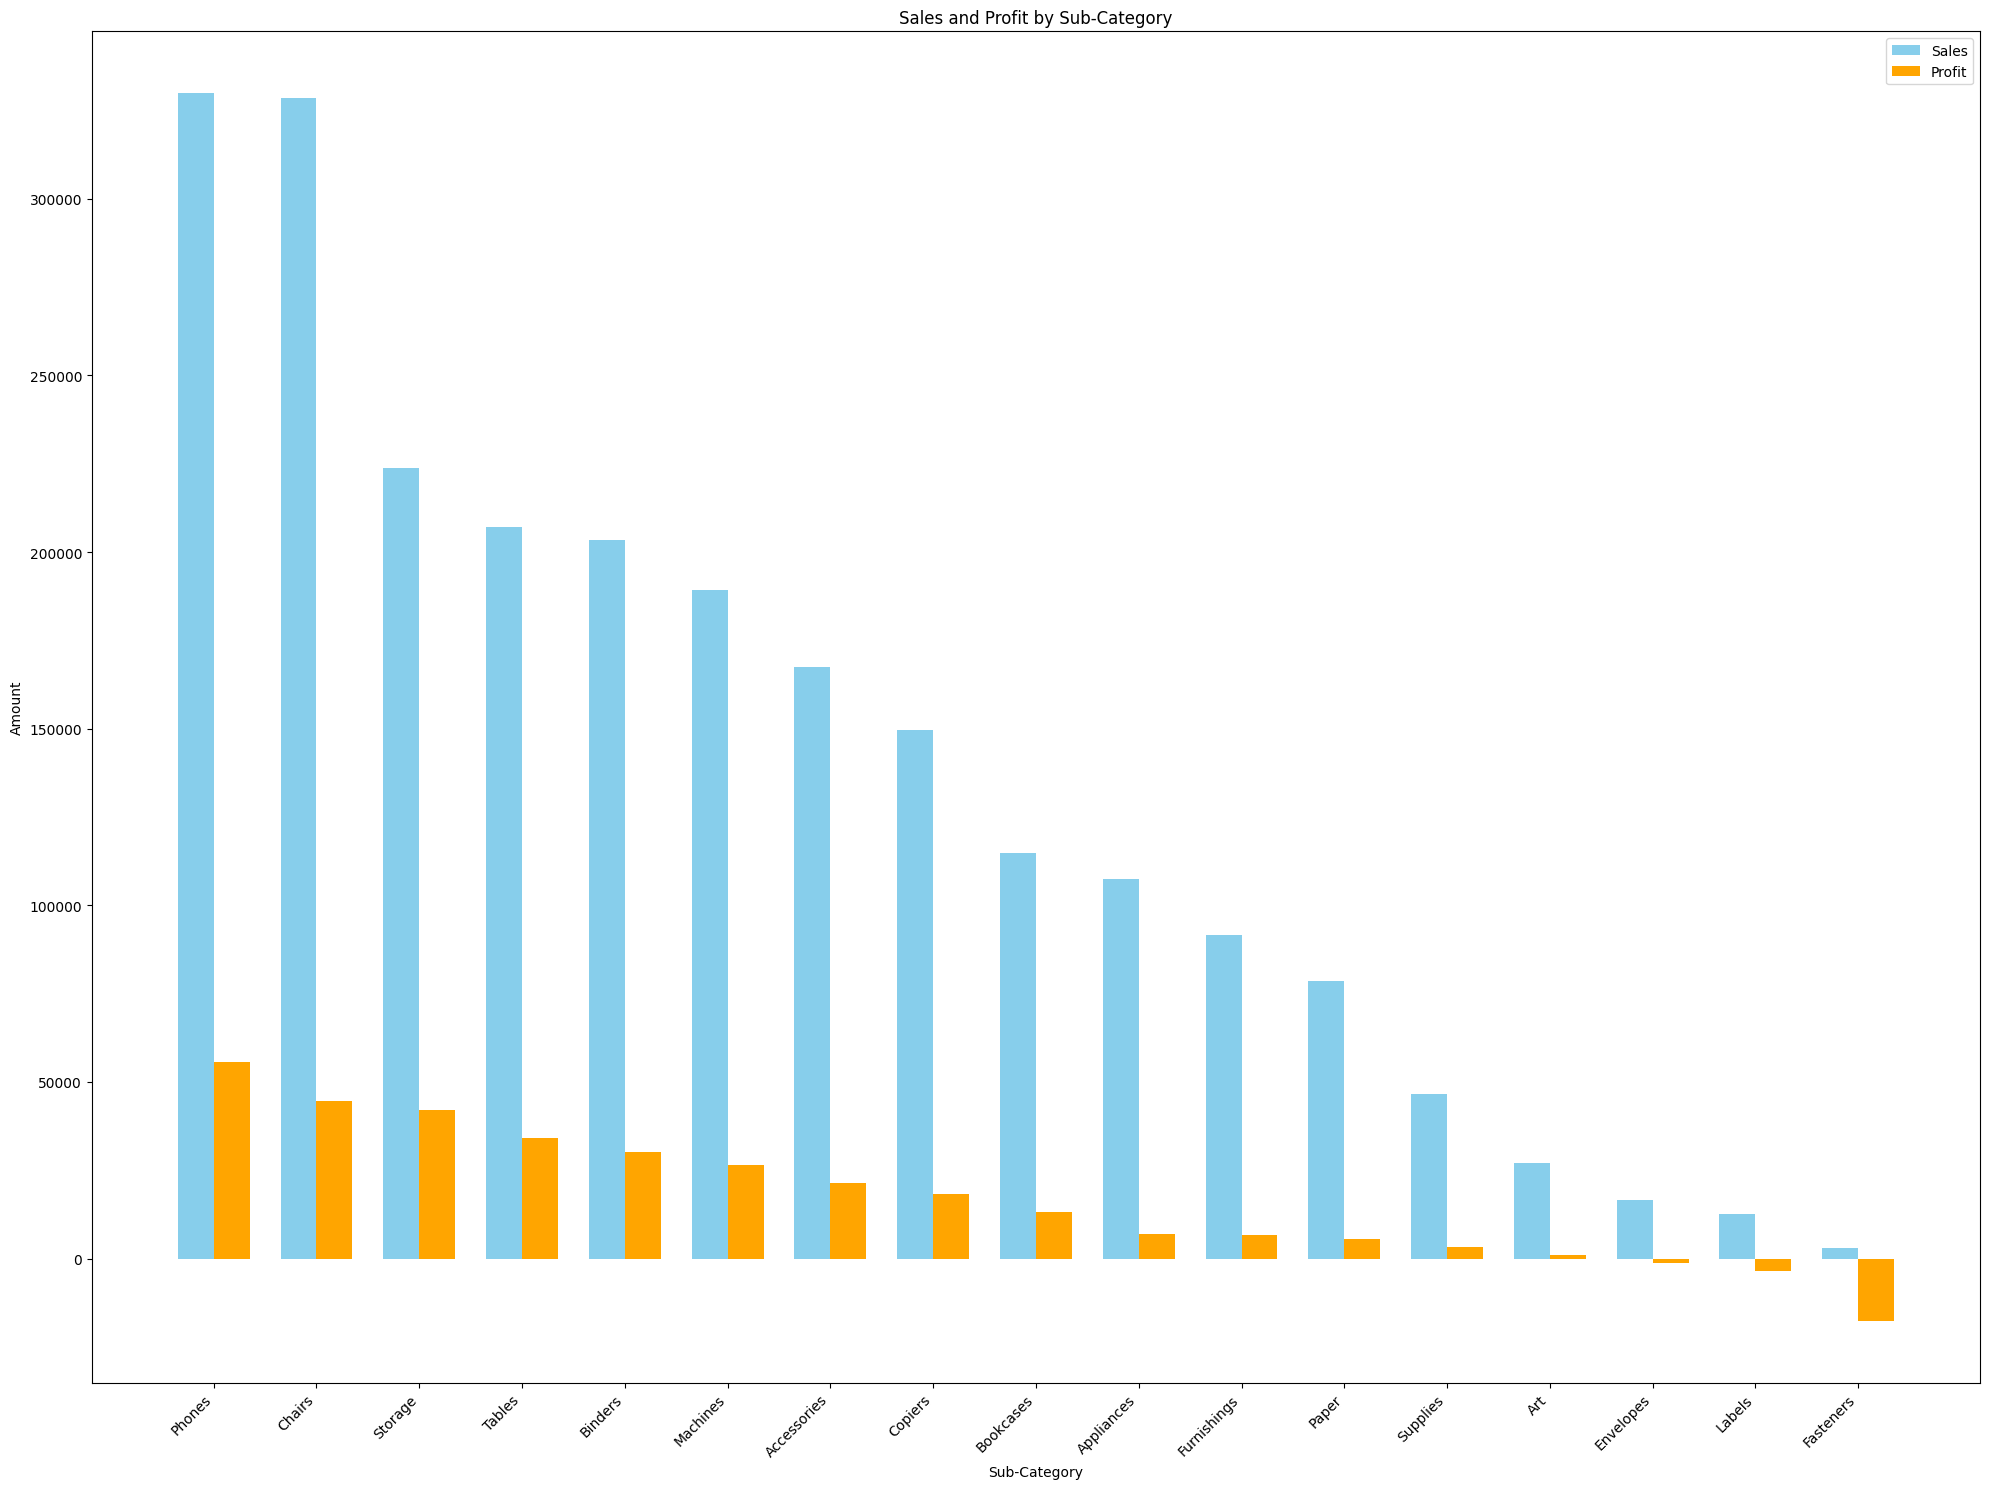

In [ ]:


# Create a figure and axes
plt.figure(figsize=(20, 15))

# Plotting both sales and profit side by side for each sub-category
bar_width = 0.35
index = range(len(segment_sales))

# Plot Sales (blue)
plt.bar(index, segment_sales, bar_width, label='Sales', color='skyblue')

# Plot Profit (orange), with an offset of bar_width to shift it
plt.bar([i + bar_width for i in index], segment_profit, bar_width, label='Profit', color='orange')

# Adding titles and labels
plt.title('Sales and Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Amount')
plt.xticks([i + bar_width / 2 for i in index], segment_sales.index, rotation=45, ha='right')

# Adding legend
plt.legend()

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Which product categories are generating the highest sales and profits?  same as we did for sub-categories

# Group by 'Category' and sum 'Sales' and 'Profit'
category_sales_profit = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'})

# Sort by sales and profit in descending order
category_sales_profit_sorted_sales = category_sales_profit.sort_values(by='Sales', ascending=False)
category_sales_profit_sorted_profit = category_sales_profit.sort_values(by='Profit', ascending=False)

print("Sales by Category (descending order):\n", category_sales_profit_sorted_sales)
print("\nProfit by Category (descending order):\n", category_sales_profit_sorted_profit)



Sales by Category (descending order):
                        Sales       Profit
Category                                 
Technology       836154.0330  145454.9481
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008

Profit by Category (descending order):
                        Sales       Profit
Category                                 
Technology       836154.0330  145454.9481
Office Supplies  719047.0320  122490.8008
Furniture        741999.7953   18451.2728


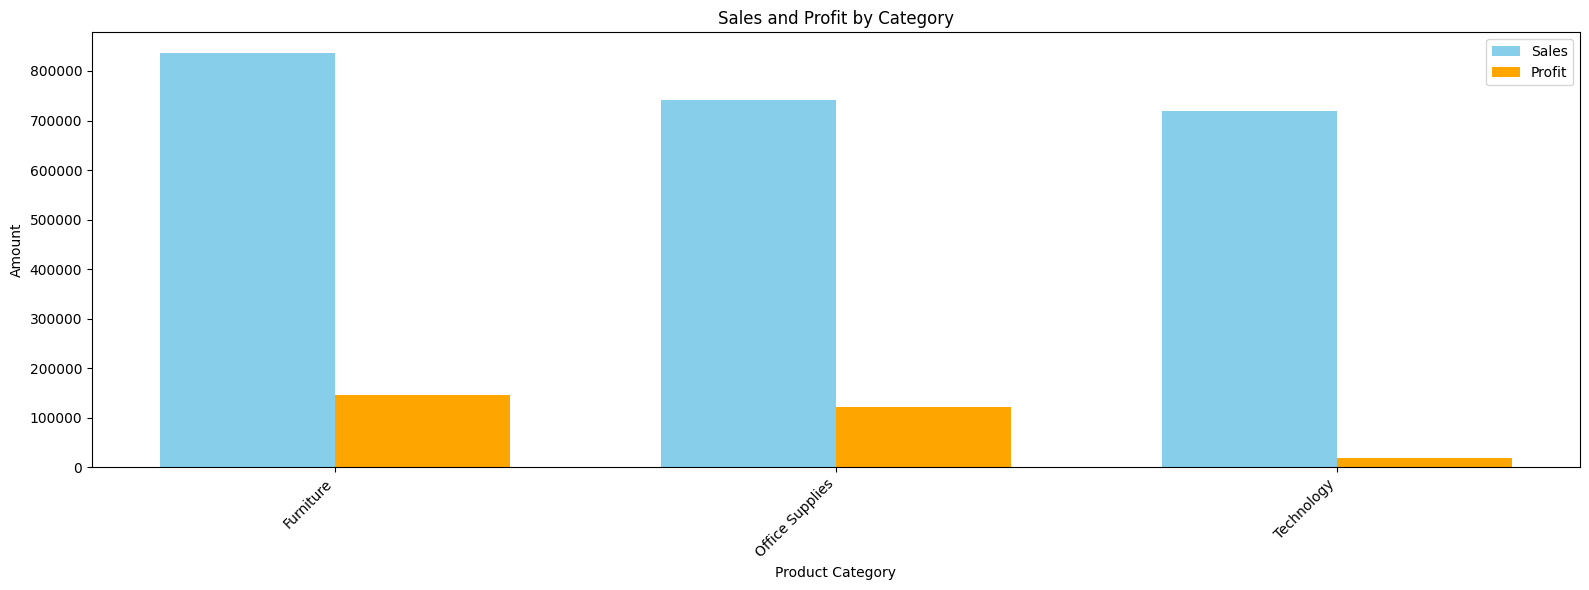

In [ ]:
# Create a figure and axes
plt.figure(figsize=(16, 6))

# Plotting both sales and profit side by side for each category
bar_width = 0.35
index = range(len(category_sales_profit))

# Plot Sales (blue)
plt.bar(index, category_sales_profit_sorted_sales['Sales'], bar_width, label='Sales', color='skyblue')

# Plot Profit (orange), with an offset of bar_width to shift it
plt.bar([i + bar_width for i in index], category_sales_profit_sorted_profit['Profit'], bar_width, label='Profit', color='orange')

# Adding titles and labels
plt.title('Sales and Profit by Category')
plt.xlabel('Product Category')
plt.ylabel('Amount')
plt.xticks([i + bar_width / 2 for i in index], category_sales_profit.index, rotation=45, ha='right')

# Adding legend
plt.legend()

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Are there any low-performing categories that are consistently losing money? done

Insights to gather: This will show which product lines contribute the most to the company’s revenue and profit, and help to identify areas where costs can be reduced or products can be improved.


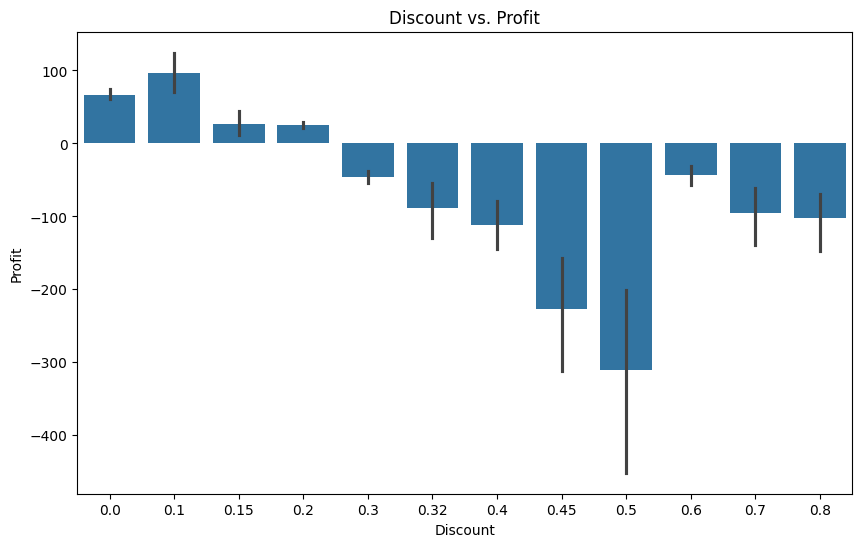

In [ ]:
# Relationship between Discount and Profit

plt.figure(figsize=(10, 6))
sns.barplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs. Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


Correlation between Discount and Profit: -0.21948745637176803


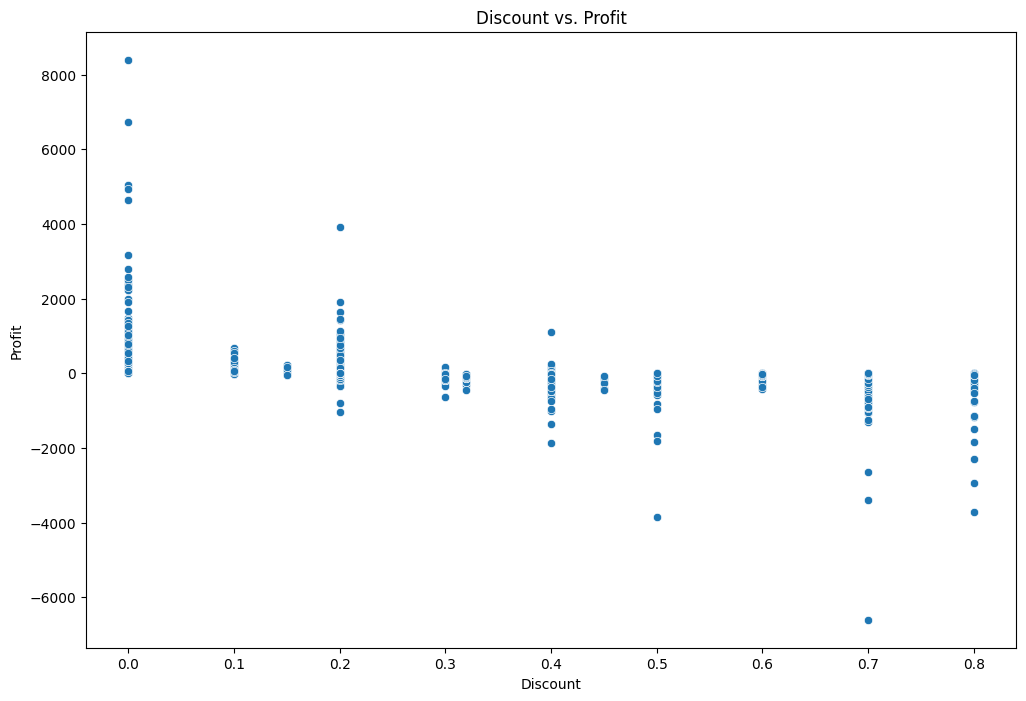

In [ ]:

discount_profit_correlation = df['Discount'].corr(df['Profit'])
print(f"\nCorrelation between Discount and Profit: {discount_profit_correlation}")

sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs. Profit')
plt.show()

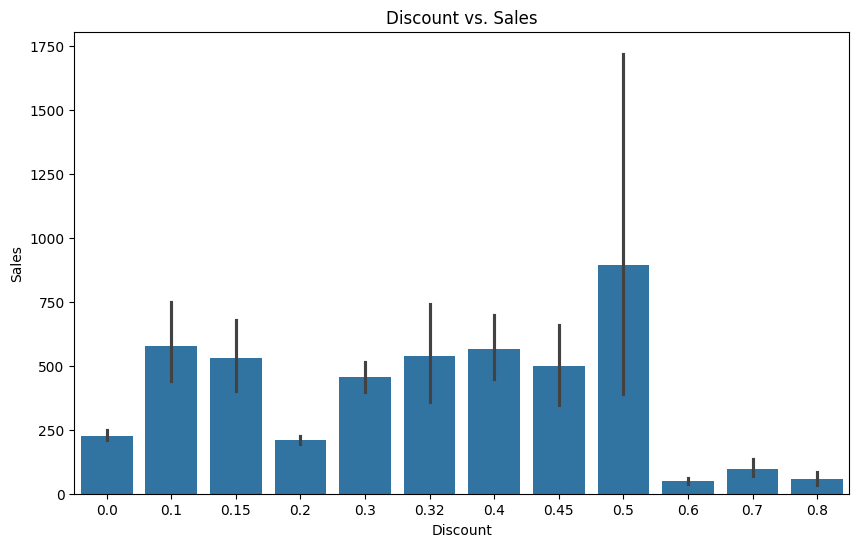

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Discount', y='Sales', data=df)
plt.title('Discount vs. Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()


Correlation between Discount and Sales: -0.028190124157535506


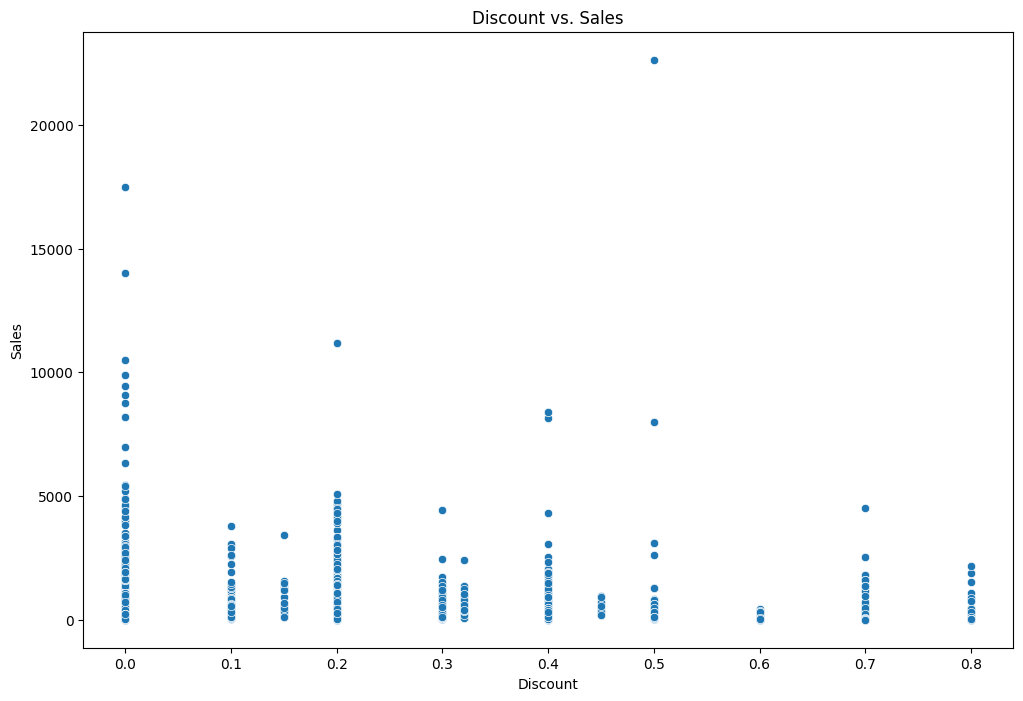

In [ ]:

discount_profit_correlation = df['Discount'].corr(df['Sales'])
print(f"\nCorrelation between Discount and Sales: {discount_profit_correlation}")

sns.scatterplot(x='Discount', y='Sales', data=df)
plt.title('Discount vs. Sales')
plt.show()

Is there a correlation between the amount of discount given and the sales or profit? done

Does offering larger discounts result in higher sales but lower profit margins?



   Sub-Category  Discount       Profit        Sales
0   Accessories      0.00    74.924106   251.317006
1   Accessories      0.20    21.866388   161.217132
2    Appliances      0.00    85.548842   288.067122
3    Appliances      0.10    67.880050   270.259313
4    Appliances      0.20    22.302051   194.279357
5    Appliances      0.80  -128.800615    50.485582
6           Art      0.00    10.804419    36.173976
7           Art      0.20     3.849619    30.550846
8       Binders      0.00   116.660091   242.817448
9       Binders      0.20    51.339981   149.114555
10      Binders      0.70   -43.687101    59.366818
11      Binders      0.80   -94.031751    58.288506
12    Bookcases      0.00   101.261862   532.266333
13    Bookcases      0.15    27.288298   529.971567
14    Bookcases      0.20     2.837004   583.510783
15    Bookcases      0.30   -55.587260   428.269800
16    Bookcases      0.32   -88.560656   536.794770
17    Bookcases      0.50  -236.433983   406.025556
18    Bookca

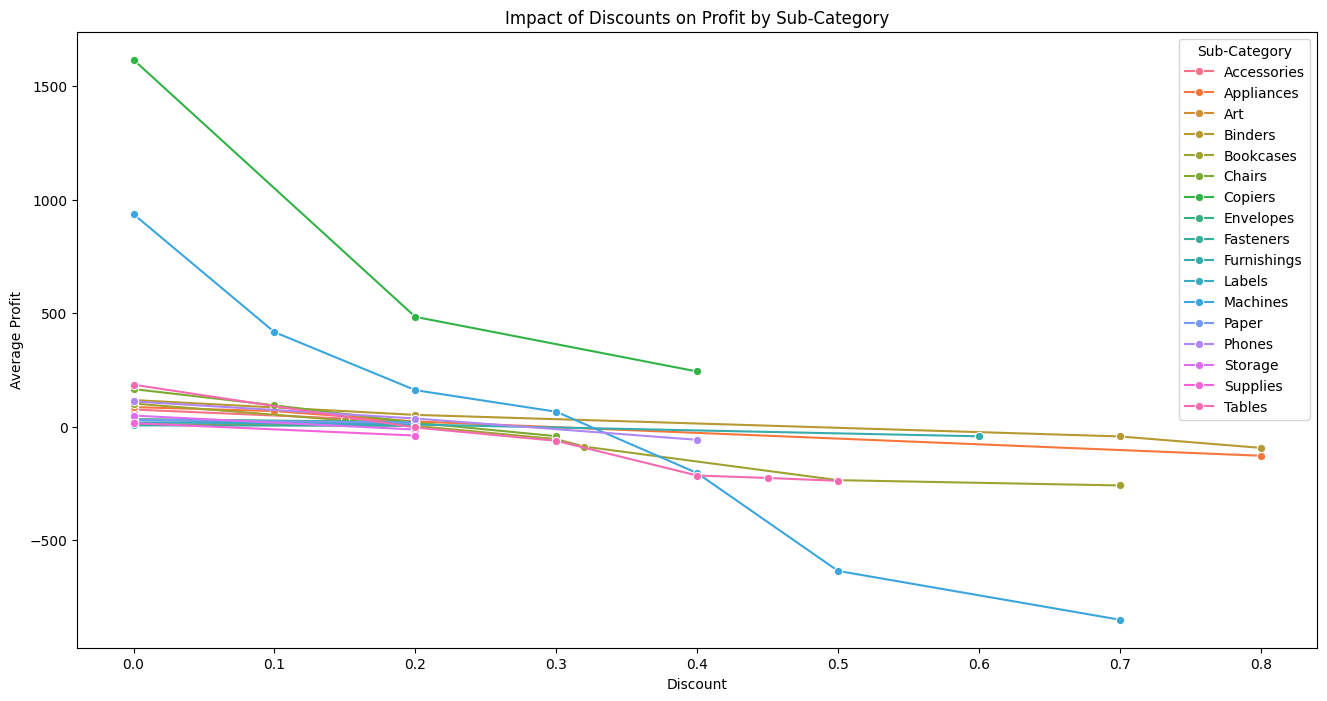

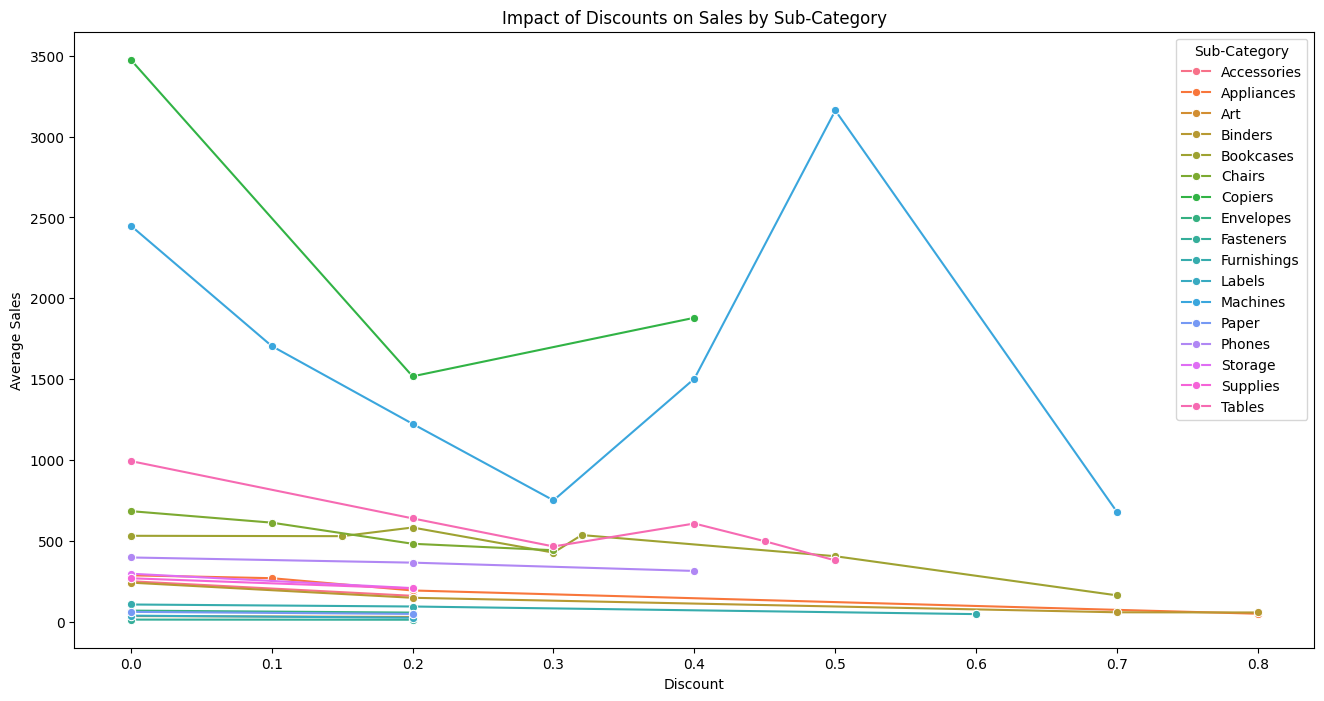

In [ ]:
# Are there certain segments or categories that respond better to discounts?

# Analyze the relationship between discounts and profit/sales for different segments.
# Group data by 'Sub-Category' and 'Discount' and calculate mean profit and sales.
segment_discount_analysis = df.groupby(['Sub-Category', 'Discount']).agg({'Profit': 'mean', 'Sales': 'mean'}).reset_index()

# Print the analysis
print(segment_discount_analysis)

# Visualize the relationship
plt.figure(figsize=(16, 8))
sns.lineplot(x='Discount', y='Profit', hue='Sub-Category', data=segment_discount_analysis, marker='o')
plt.title('Impact of Discounts on Profit by Sub-Category')
plt.xlabel('Discount')
plt.ylabel('Average Profit')
plt.show()

plt.figure(figsize=(16, 8))
sns.lineplot(x='Discount', y='Sales', hue='Sub-Category', data=segment_discount_analysis, marker='o')
plt.title('Impact of Discounts on Sales by Sub-Category')
plt.xlabel('Discount')
plt.ylabel('Average Sales')
plt.show()

#Further analysis could include statistical tests (ANOVA, t-tests) to determine if the differences are statistically significant.

Insights to gather: Understanding the relationship between discounts and profit can help optimize discounting strategies, ensuring discounts are used effectively to maximize profit.



Correlation between Sales and Profit: 0.4790643497377062


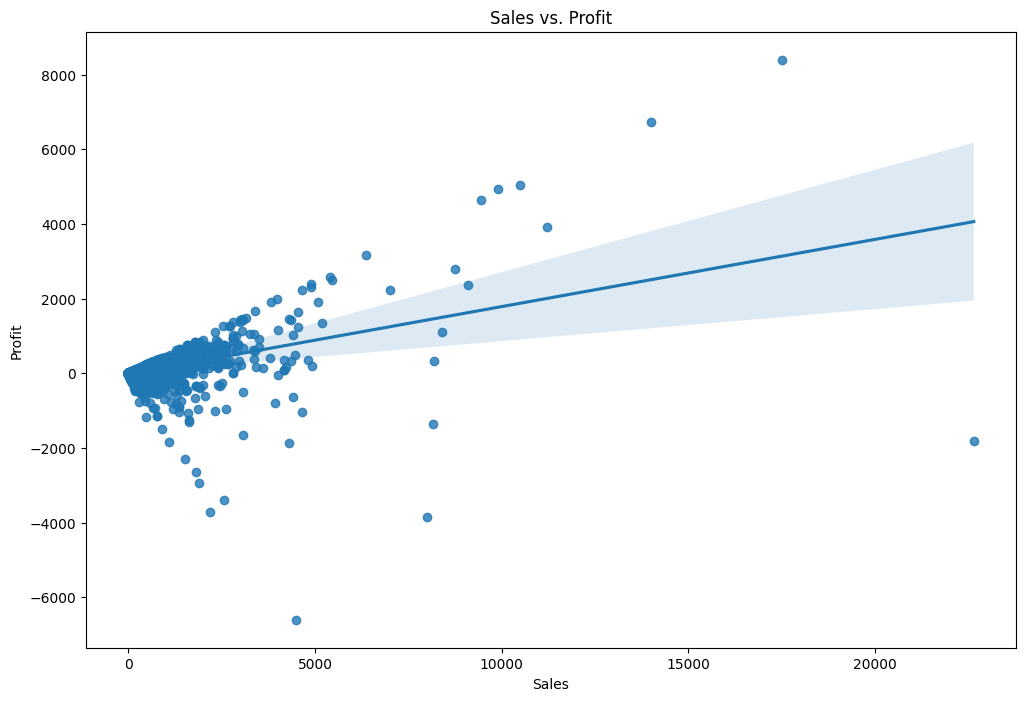

In [ ]:
# Relationship between Sales and Profit
sales_profit_correlation = df['Sales'].corr(df['Profit'])
print(f"\nCorrelation between Sales and Profit: {sales_profit_correlation}")

#Visualize the relationship
sns.regplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs. Profit')
plt.show()

<ipython-input-42-b83bf1b3720c>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_profit_by_bin = df.groupby(sales_bins)['Profit'].mean()



Average profit by sales ranges:
 Sales
(-22.194, 2264.248]         19.381488
(2264.248, 4528.051]       424.632529
(4528.051, 6791.855]      1603.439738
(6791.855, 9055.658]       214.581933
(9055.658, 11319.462]     4180.560340
(11319.462, 13583.266]            NaN
(13583.266, 15847.069]    6719.980800
(15847.069, 18110.873]    8399.976000
(18110.873, 20374.676]            NaN
(20374.676, 22638.48]    -1811.078400
Name: Profit, dtype: float64


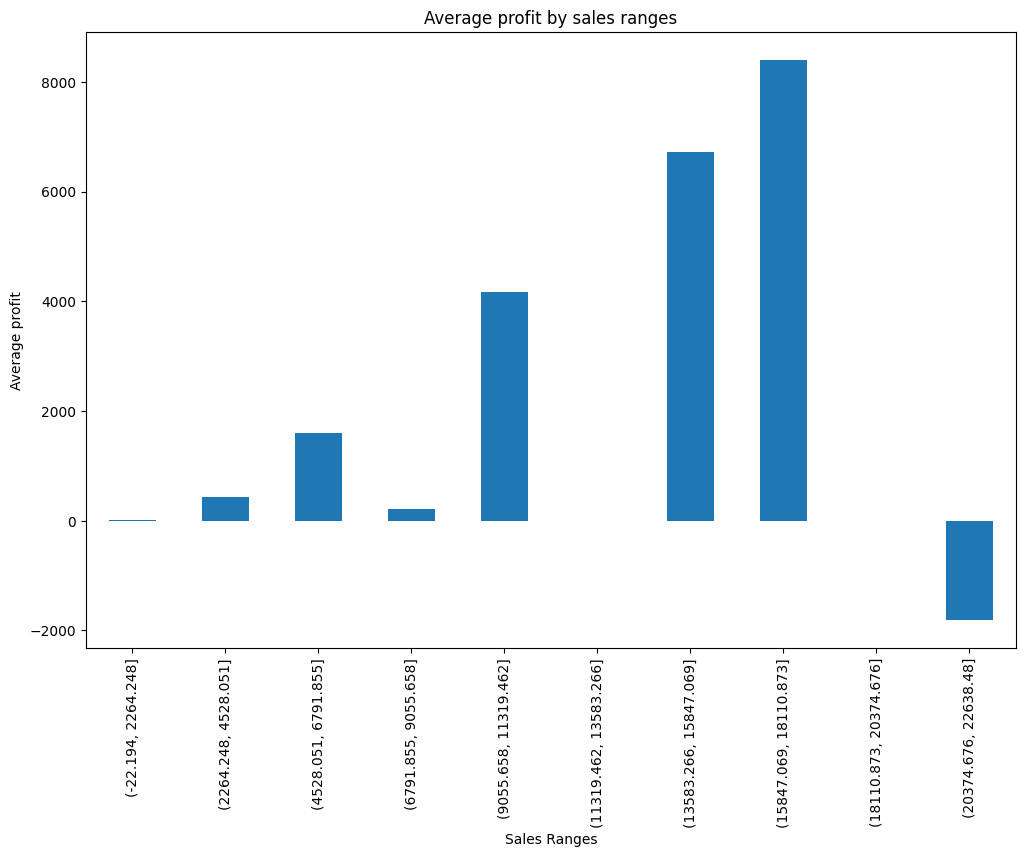

In [ ]:
#Further analysis to check if higher sales always lead to higher profits.
#Group data by sales ranges and calculate average profit for each range
sales_bins = pd.cut(df['Sales'], bins=10)  #Divide sales into 10 bins
sales_profit_by_bin = df.groupby(sales_bins)['Profit'].mean()
print("\nAverage profit by sales ranges:\n",sales_profit_by_bin)

#Plot average profit against sales ranges
sales_profit_by_bin.plot(kind='bar')
plt.title("Average profit by sales ranges")
plt.xlabel("Sales Ranges")
plt.ylabel("Average profit")
plt.show()

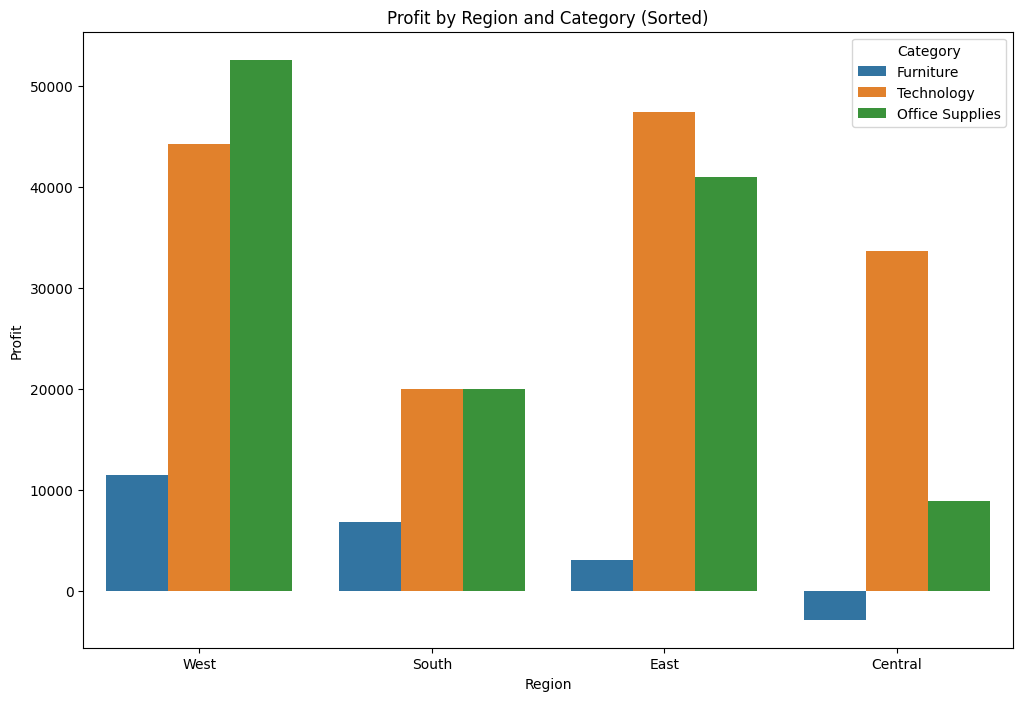

In [ ]:

# Sales and Profit by Category and Region
region_category_analysis = df.groupby(['Region', 'Category'])[['Sales', 'Profit']].sum().reset_index()
region_category_analysis = region_category_analysis.sort_values(by=['Region', 'Profit'], ascending=[False,True ]) # Sort by Region then Profit
sns.barplot(x='Region', y='Profit', hue='Category', data=region_category_analysis)
plt.title('Profit by Region and Category (Sorted)')
plt.show()

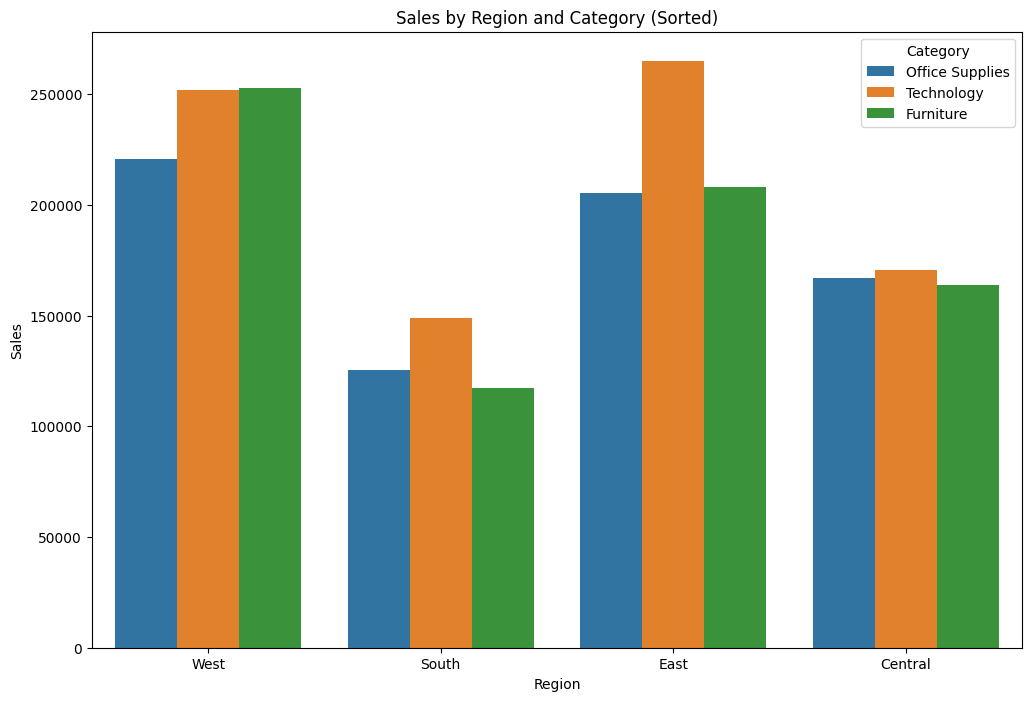

In [ ]:
region_category_analysis = region_category_analysis.sort_values(by=['Region', 'Sales'], ascending=[False,True]) # Sort by Region then Profit
sns.barplot(x='Region', y='Sales', hue='Category', data=region_category_analysis)
plt.title('Sales by Region and Category (Sorted)')
plt.show()

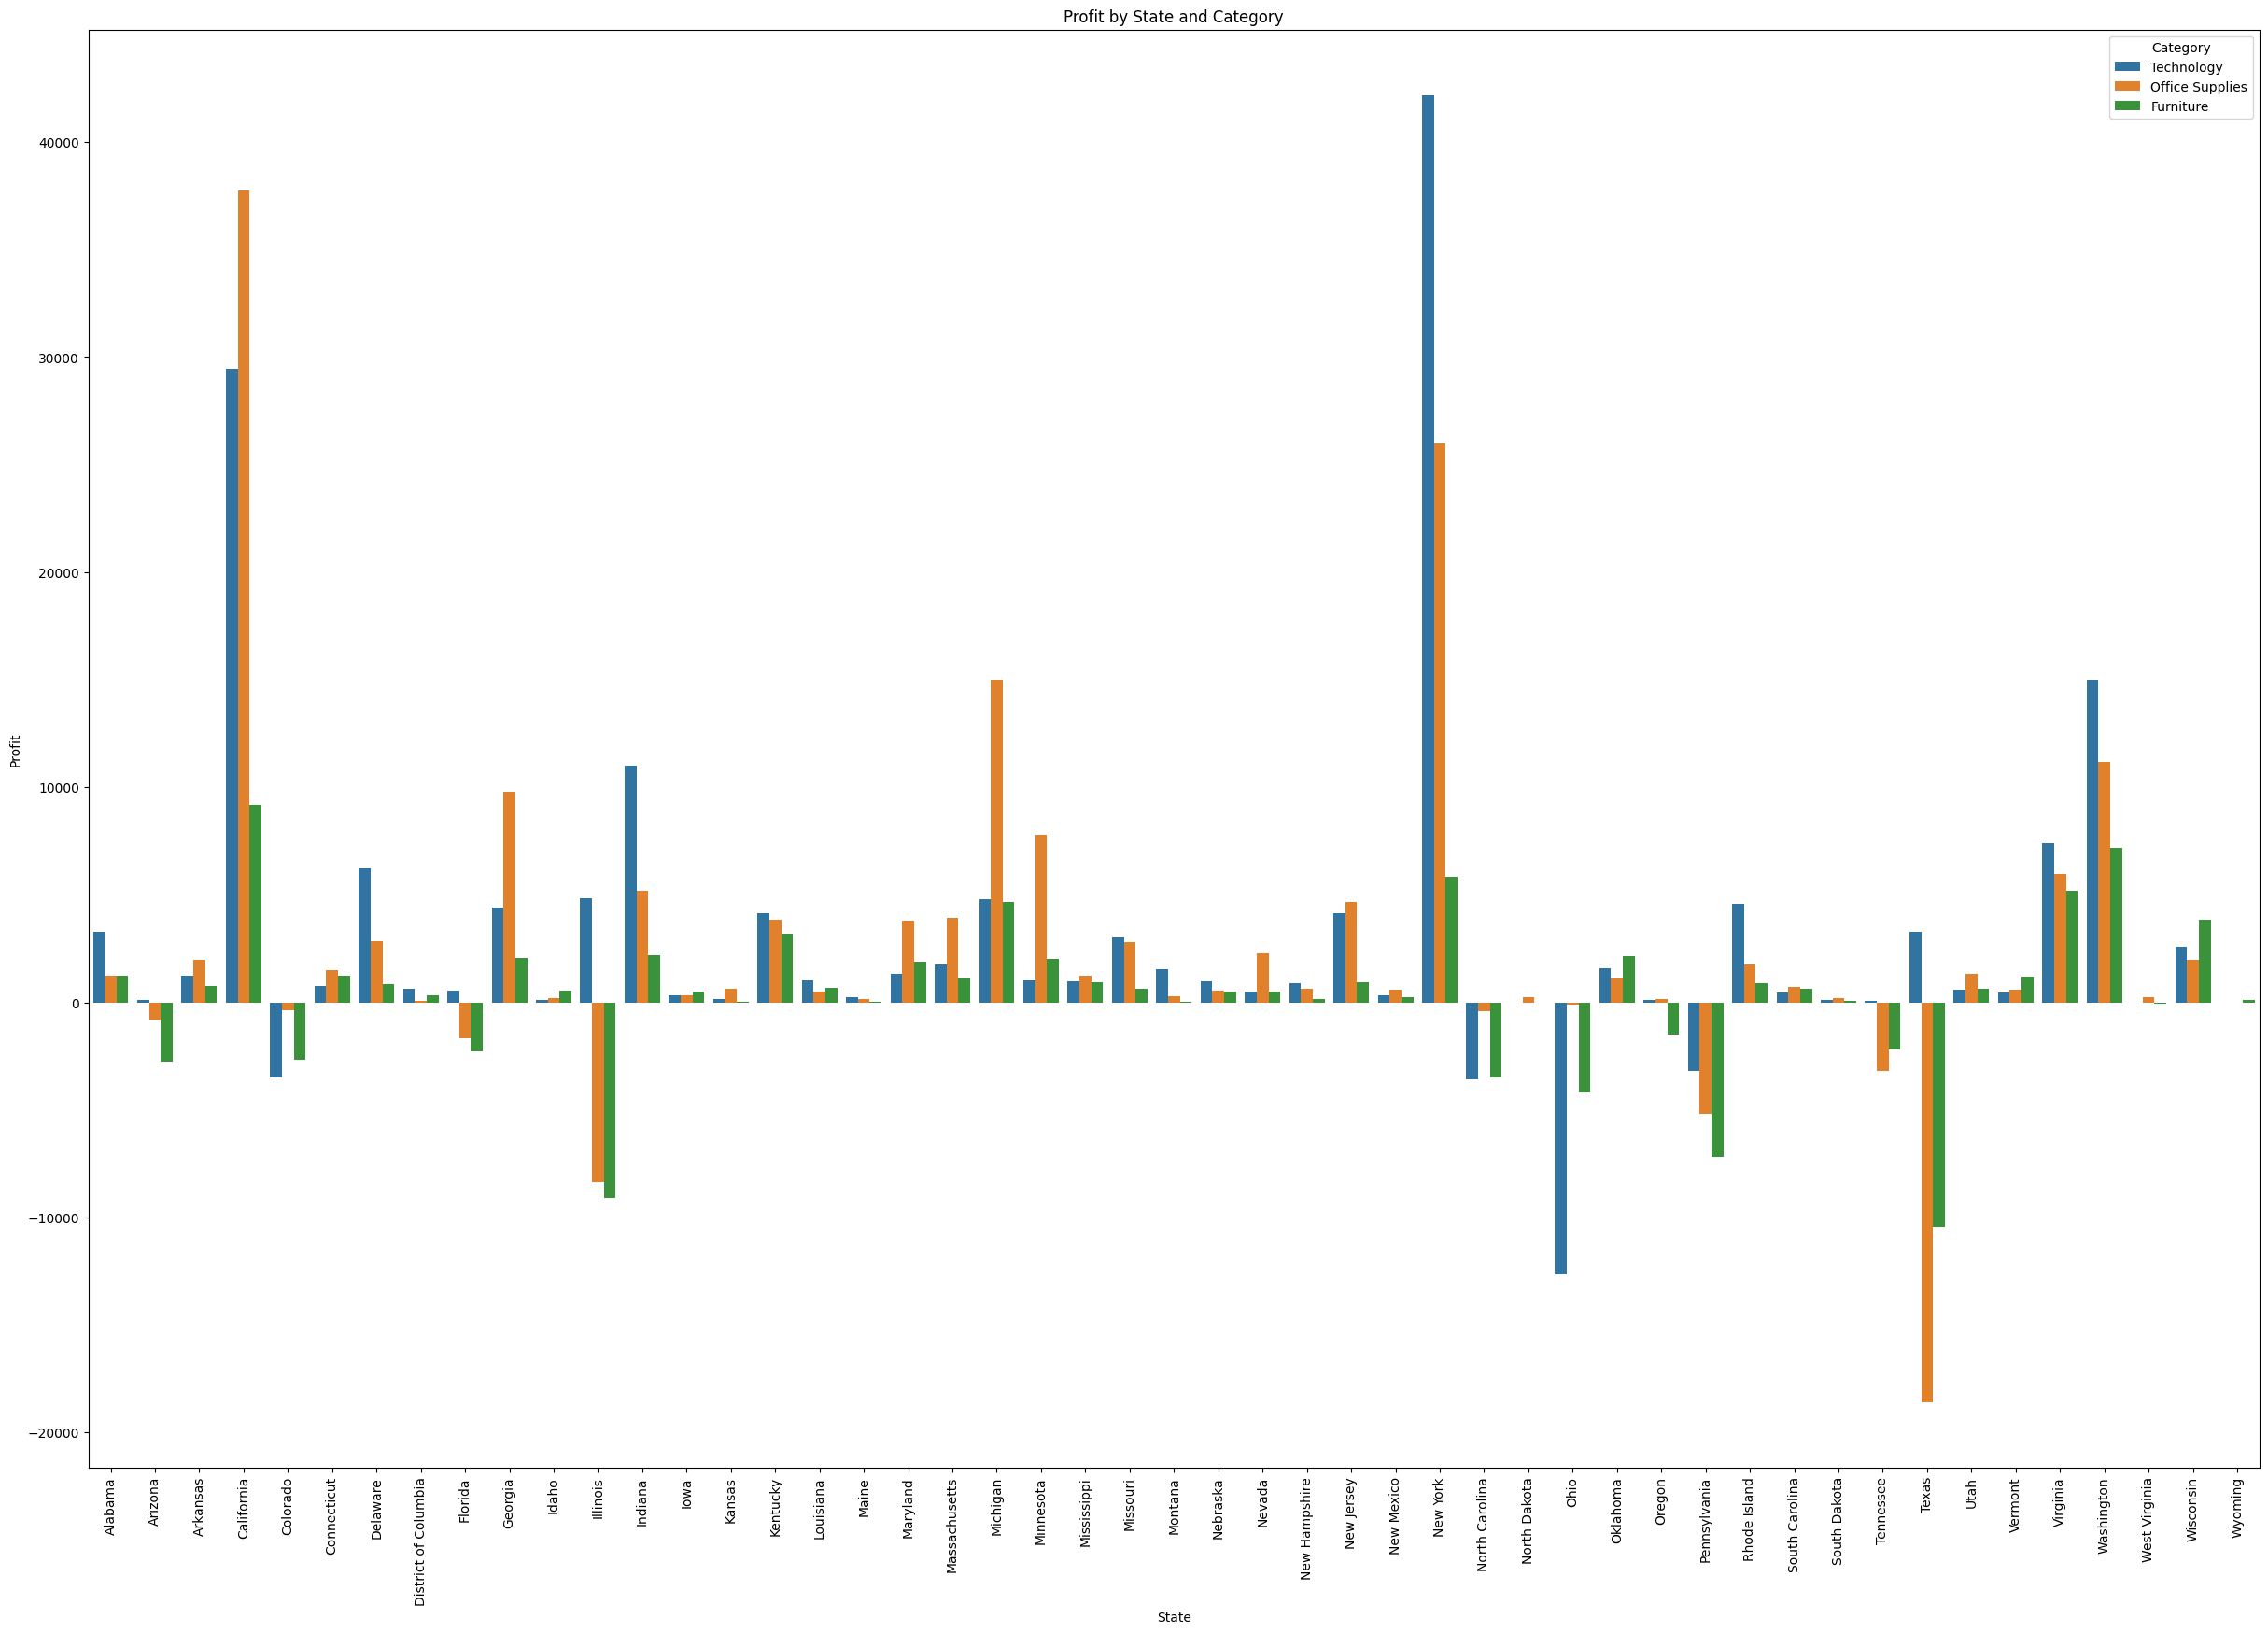

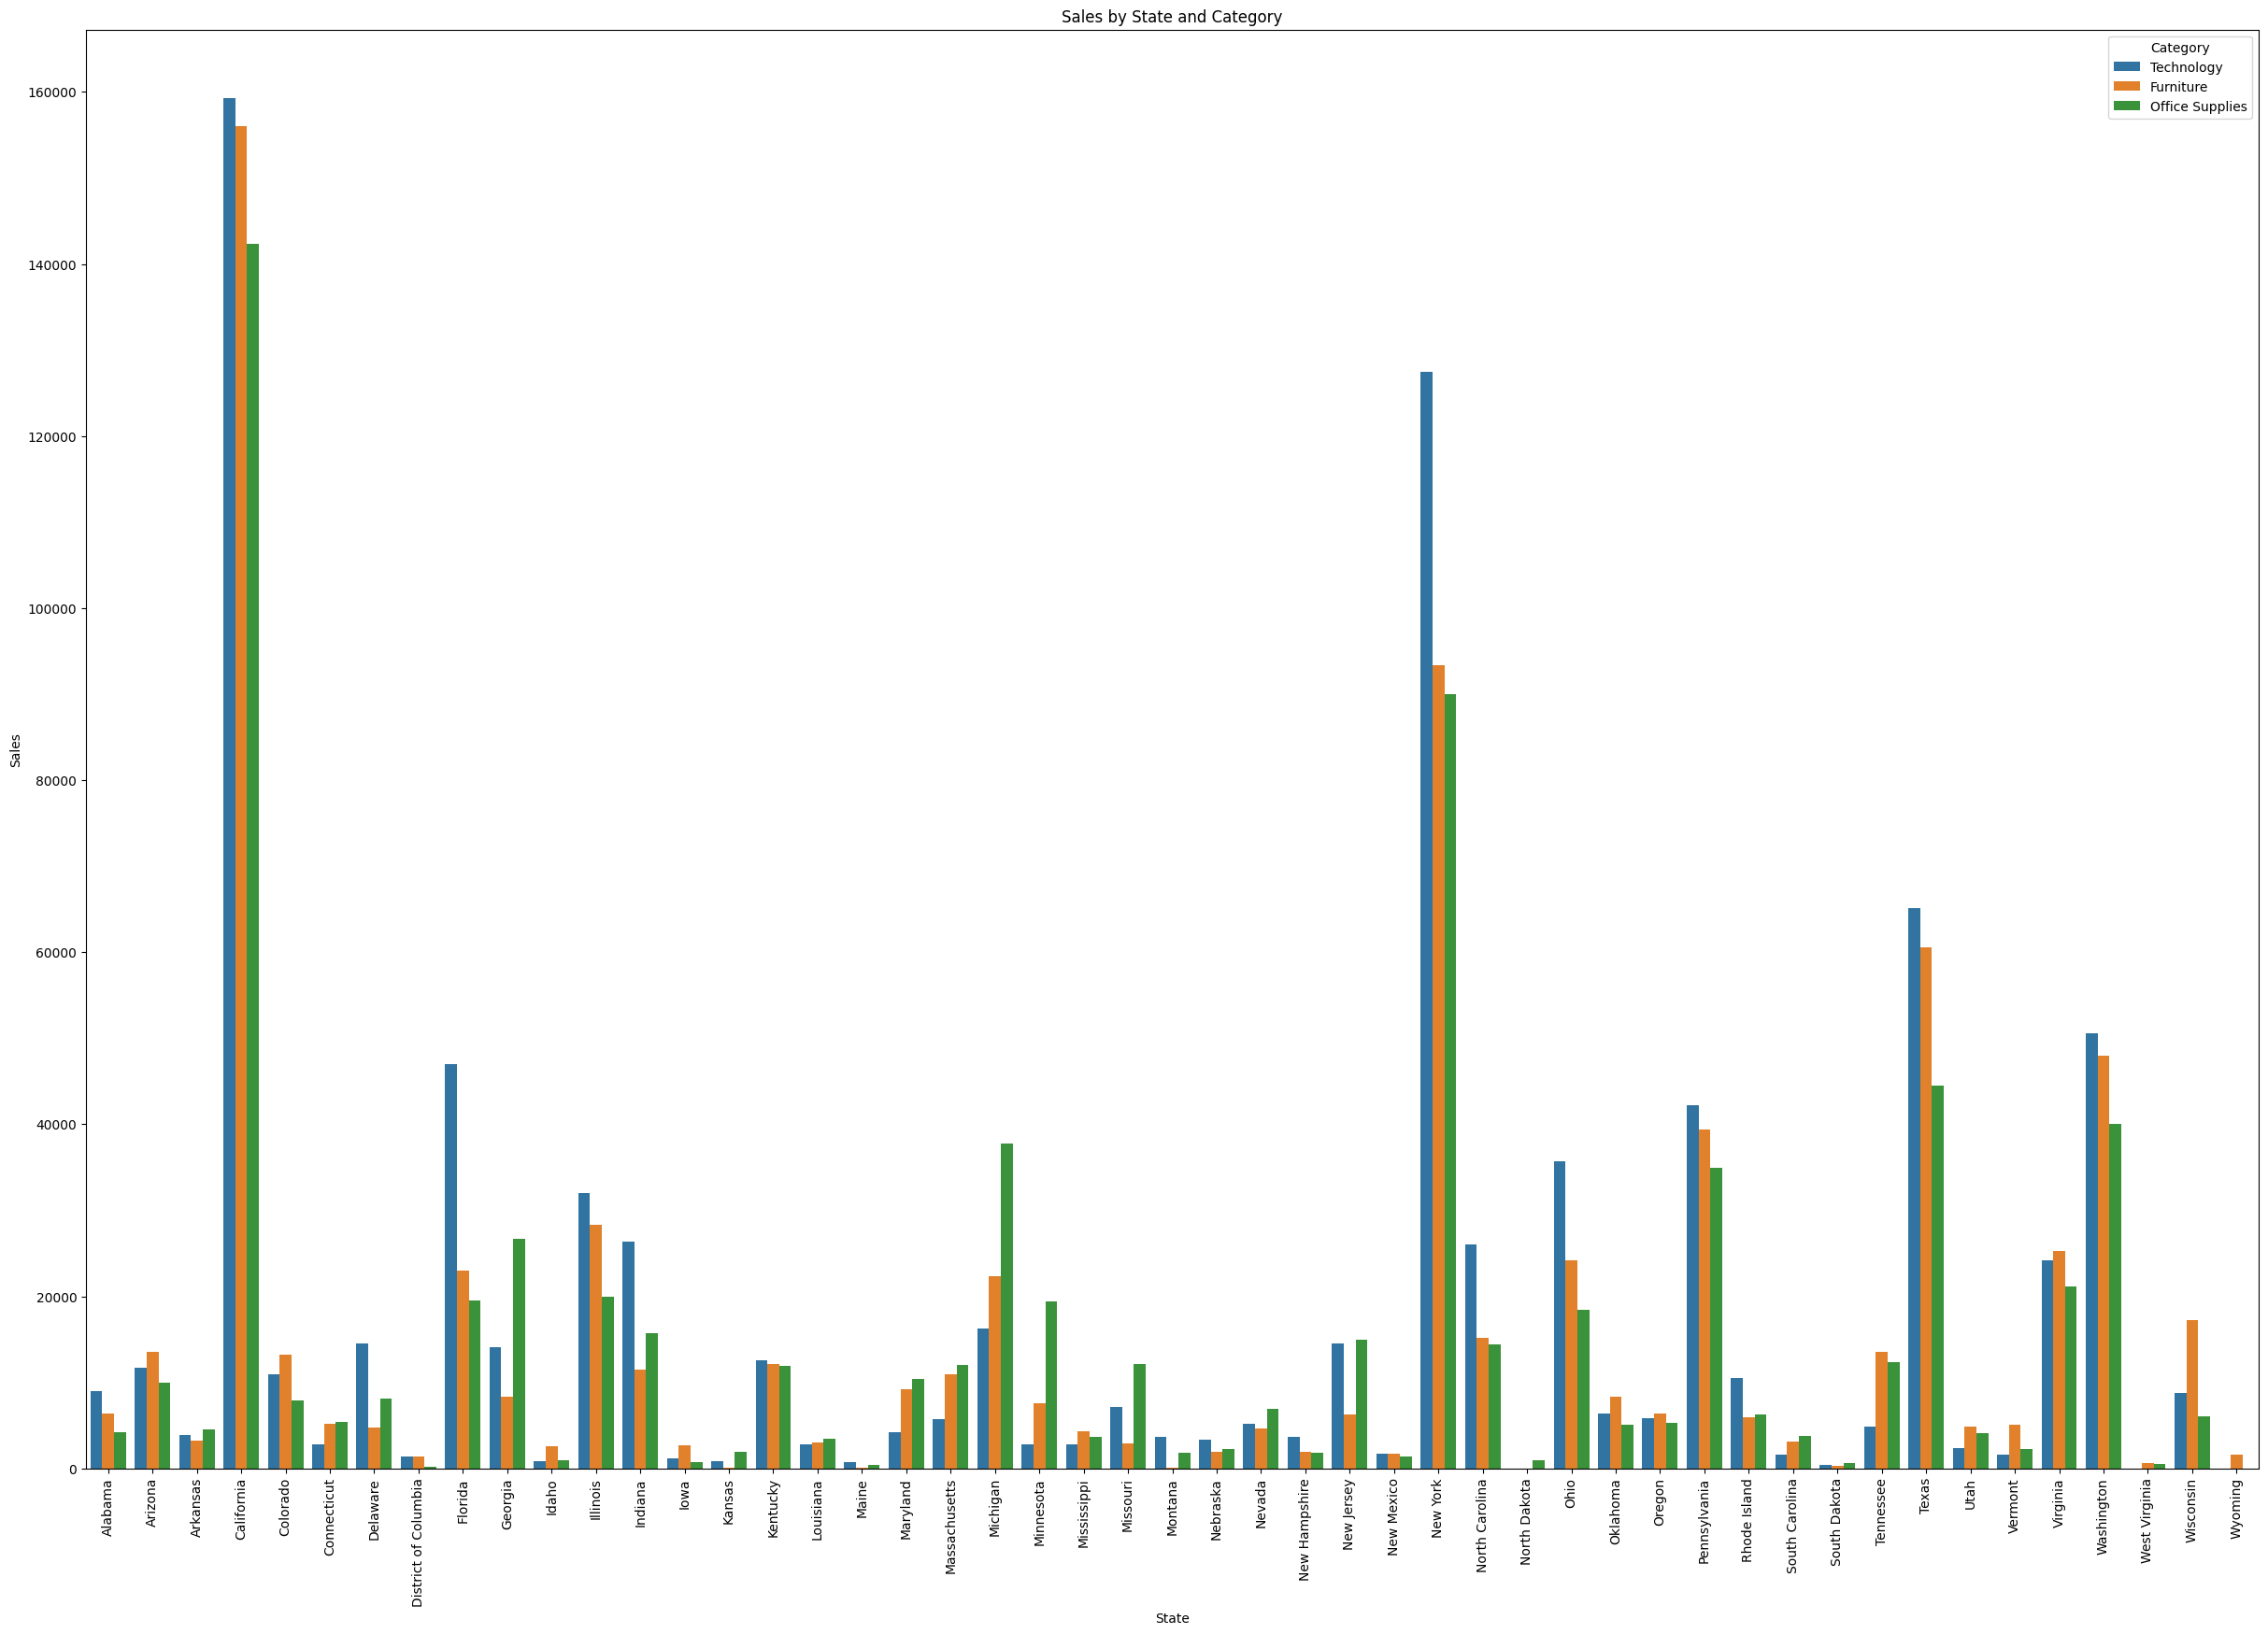

In [ ]:

# Sales and Profit by State and Category
state_category_analysis = df.groupby(['State', 'Category'])[['Sales', 'Profit']].sum().reset_index()

#Sort by State then Profit
state_category_analysis = state_category_analysis.sort_values(by=['State', 'Profit'], ascending=[True, False])

#Plot sales and profit by state and category
plt.figure(figsize=(30, 20))  # Adjust the figure size if needed
sns.barplot(x='State', y='Profit', hue='Category', data=state_category_analysis)
plt.xticks(rotation=90)
plt.title('Profit by State and Category')
plt.show()


state_category_analysis = state_category_analysis.sort_values(by=['State', 'Sales'], ascending=[True,False])
plt.figure(figsize=(30, 20))
sns.barplot(x='State', y='Sales', hue='Category', data=state_category_analysis)
plt.xticks(rotation=90)
plt.title('Sales by State and Category')
plt.show()



Insights to gather: Geographic analysis can help identify potential areas for expansion or marketing efforts. If a region has low sales, it could be due to supply chain issues, poor marketing, or other factors.


Effect of Discounts on Profitability

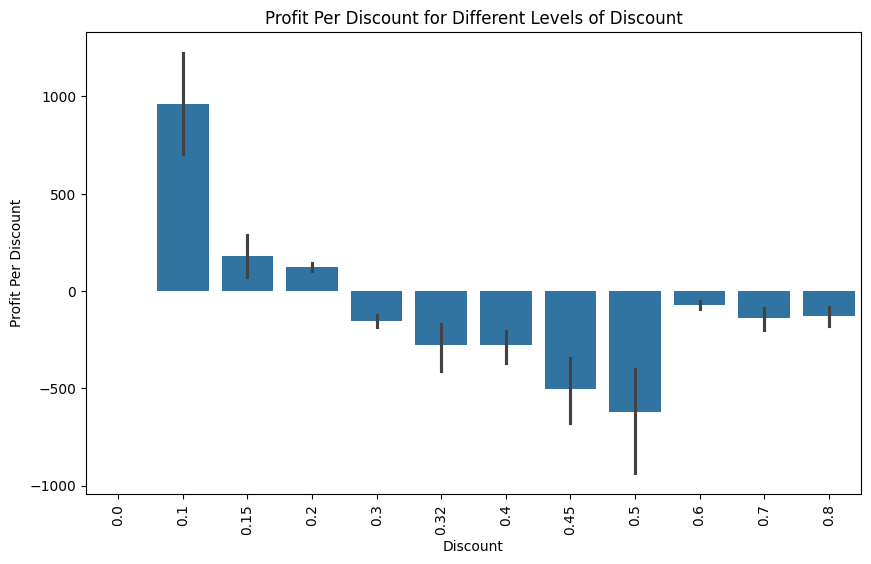

In [ ]:
df['Profit_Per_Discount'] = df['Profit'] / df['Discount']
discount_profit_relation = df.groupby('Discount')['Profit_Per_Discount'].mean()

# Plot the Profit_Per_Discount for different levels of discount
plt.figure(figsize=(10, 6))
sns.barplot(x='Discount', y='Profit_Per_Discount', data=df)
plt.title('Profit Per Discount for Different Levels of Discount')
plt.xlabel('Discount')
plt.ylabel('Profit Per Discount')
plt.xticks(rotation=90)
plt.show()


In [ ]:
#give you rows where profits are negative.
df[df['Profit'] < 0]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit_Per_Discount
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-851.180000
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580,-154.822500
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160,-4.770000
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196,-3.398667
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522,-3330.104400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176,-44.772000
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936,-6.562286
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960,-267.973333
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772,-8.886000


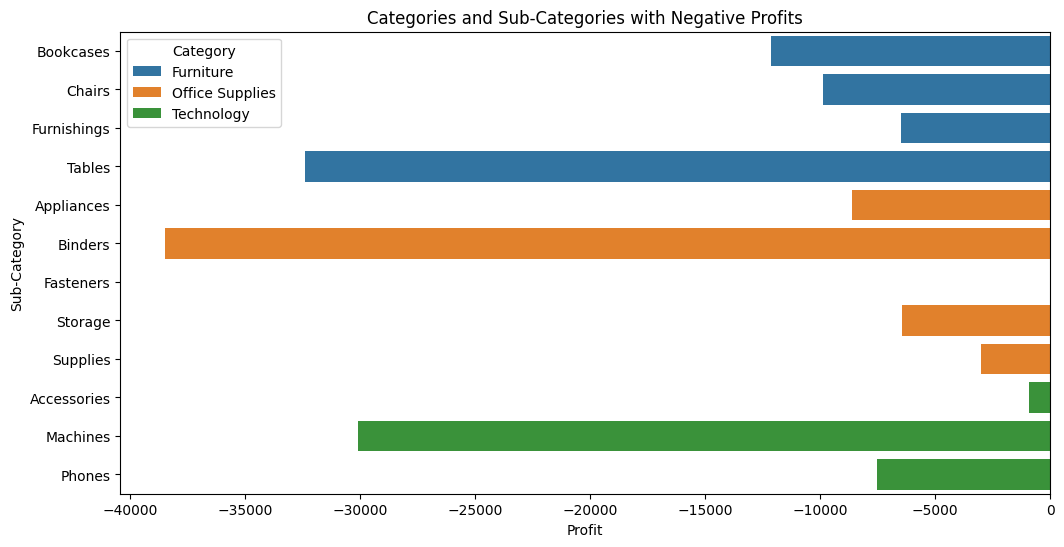

In [ ]:
# Investigate categories with negative profits
loss_categories = df[df['Profit'] < 0].groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()

# Plot categories with negative profits
plt.figure(figsize=(12, 6))
sns.barplot(x='Profit', y='Sub-Category', data=loss_categories, hue='Category')
plt.title('Categories and Sub-Categories with Negative Profits')
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.show()



Which customer segments (e.g., Consumer, Corporate, Home Office) generate the highest profit?

Are certain segments more price-sensitive than others?

How do different segments respond to different shipping modes or discounts?


Profit by Segment:
 Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64


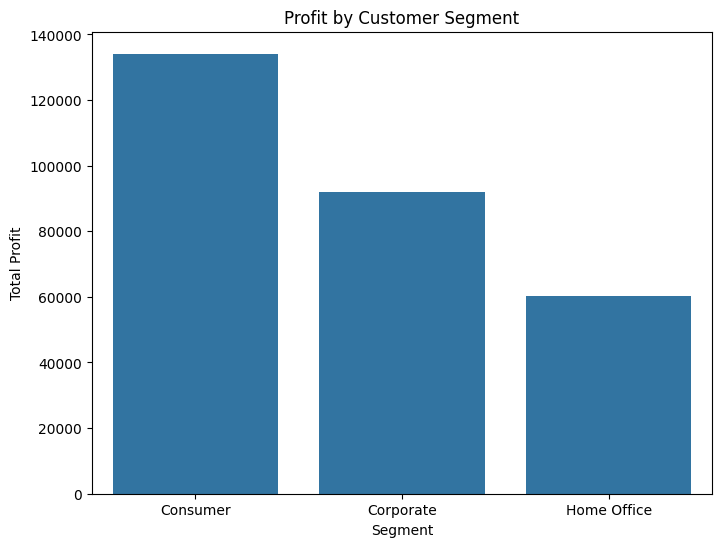


Average Discount and Profit by Segment:
              Discount     Profit
Segment                         
Consumer     0.158141  25.836873
Corporate    0.158228  30.456667
Home Office  0.147128  33.818664


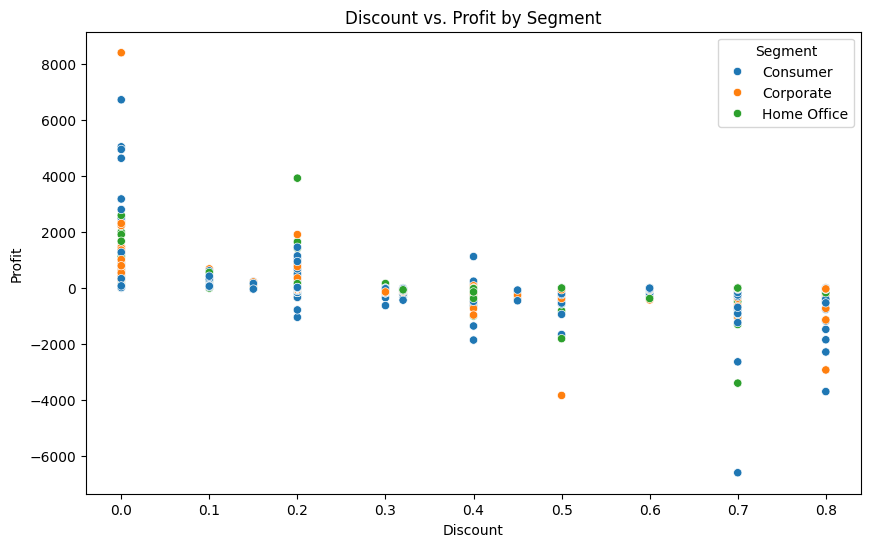


Average Profit and Discount by Shipping Mode and Segment:
          Ship Mode      Segment     Profit  Discount
0      First Class     Consumer  27.794595  0.161131
1      First Class    Corporate  29.823654  0.171381
2      First Class  Home Office  46.237056  0.162465
3         Same Day     Consumer  31.148913  0.159779
4         Same Day    Corporate  15.948612  0.143860
5         Same Day  Home Office  37.494747  0.140179
6     Second Class     Consumer  24.457756  0.142314
7     Second Class    Corporate  29.927279  0.138079
8     Second Class  Home Office  45.170921  0.129430
9   Standard Class     Consumer  25.259011  0.162460
10  Standard Class    Corporate  31.716781  0.162384
11  Standard Class  Home Office  26.791720  0.149010


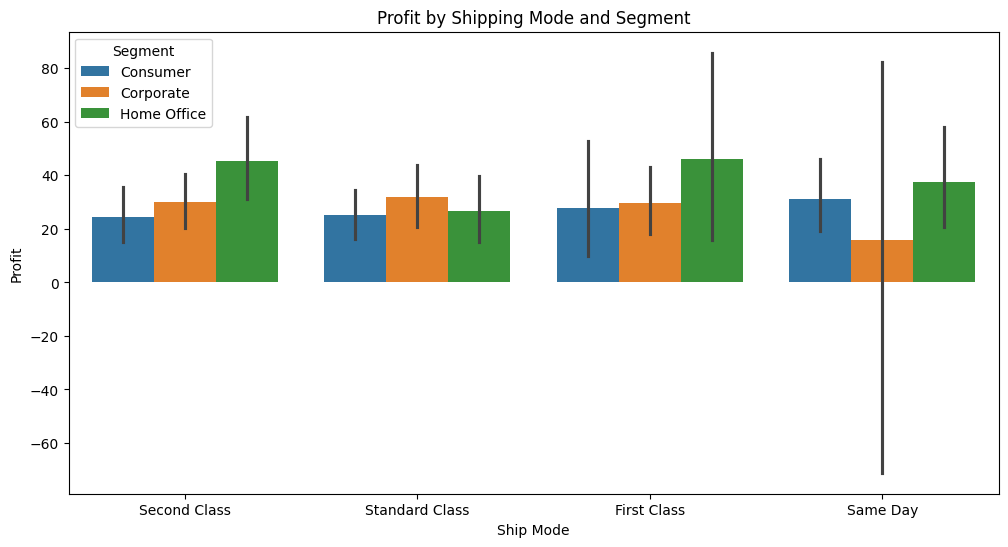

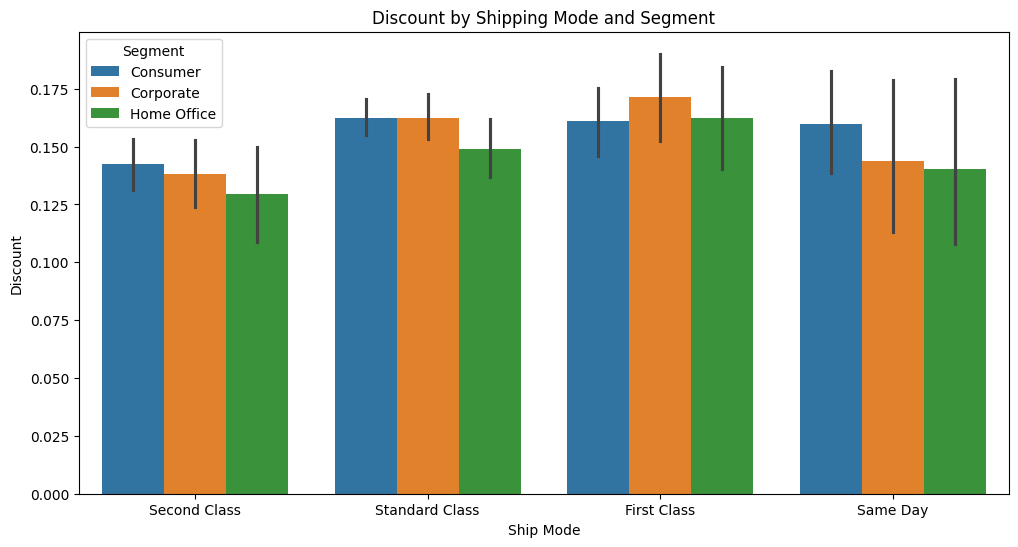

In [ ]:
# answer these questions

# Segment analysis for profit
segment_profit = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
print("\nProfit by Segment:\n", segment_profit)

# Visualize profit by segment
plt.figure(figsize=(8, 6))
sns.barplot(x=segment_profit.index, y=segment_profit.values)
plt.title('Profit by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.show()


# Price sensitivity analysis (example using discount impact)
segment_discount_impact = df.groupby('Segment').agg({'Discount': 'mean', 'Profit': 'mean'})
print("\nAverage Discount and Profit by Segment:\n", segment_discount_impact)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', hue='Segment', data=df)
plt.title('Discount vs. Profit by Segment')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


# Shipping mode and discount impact
shipping_discount_impact = df.groupby(['Ship Mode', 'Segment']).agg(
    {'Profit': 'mean', 'Discount': 'mean'}
).reset_index()
print("\nAverage Profit and Discount by Shipping Mode and Segment:\n", shipping_discount_impact)

plt.figure(figsize=(12, 6))
sns.barplot(x='Ship Mode', y='Profit', hue='Segment', data=df)
plt.title('Profit by Shipping Mode and Segment')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Ship Mode', y='Discount', hue='Segment', data=df)
plt.title('Discount by Shipping Mode and Segment')
plt.show()

Insights to gather:
This will allow businesses to focus marketing efforts and resource allocation on the most profitable customer segments.


# **--------------------------------------------------------------------------**

What is the relationship between quantity sold and profit?

Correlation between Quantity Sold and Profit: 0.06625318912428488


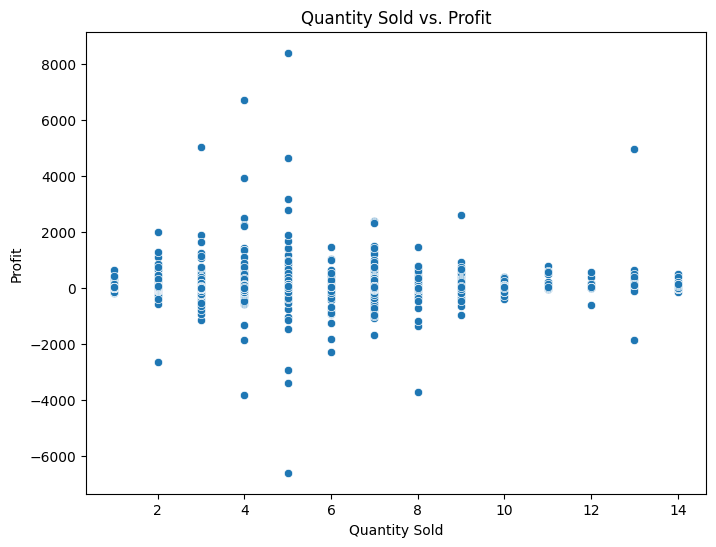

In [ ]:
# Is there a positive correlation between the quantity sold and the profit generated?

# Calculate the correlation between quantity sold and profit
quantity_profit_correlation = df['Quantity'].corr(df['Profit'])

print(f"Correlation between Quantity Sold and Profit: {quantity_profit_correlation}")

# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='Profit', data=df)
plt.title('Quantity Sold vs. Profit')
plt.xlabel('Quantity Sold')
plt.ylabel('Profit')
plt.show()

In [ ]:
# Are there products that sell in high quantities but still result in low profit?

# Group by 'Sub-Category' and calculate total sales and total profit
sales_profit_by_subcategory = df.groupby('Sub-Category').agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'})

# Calculate profit margin for each subcategory
sales_profit_by_subcategory['Profit Margin'] = (sales_profit_by_subcategory['Profit'] / sales_profit_by_subcategory['Sales']) * 100

# Sort by quantity sold in descending order
sales_profit_by_subcategory = sales_profit_by_subcategory.sort_values('Quantity', ascending=False)

# Filter out subcategories with low profit margin (you can adjust this threshold)
low_profit_high_sales = sales_profit_by_subcategory[sales_profit_by_subcategory['Profit Margin'] > 50] # Example: less than 5% profit margin

print("\nSubcategories with high sales but low profit margins:\n", low_profit_high_sales)


Subcategories with high sales but low profit margins:
 Empty DataFrame
Columns: [Sales, Profit, Quantity, Profit Margin]
Index: []


In [ ]:
low_profit_high_sales = sales_profit_by_subcategory[sales_profit_by_subcategory['Profit Margin'] < 0]
low_profit_high_sales

,Sales,Profit,Quantity,Profit Margin
Sub-Category,,,,
Tables,206965.5320,-17725.4811,1241,-8.564460
Bookcases,114879.9963,-3472.5560,868,-3.022768
Supplies,46673.5380,-1189.0995,647,-2.547695


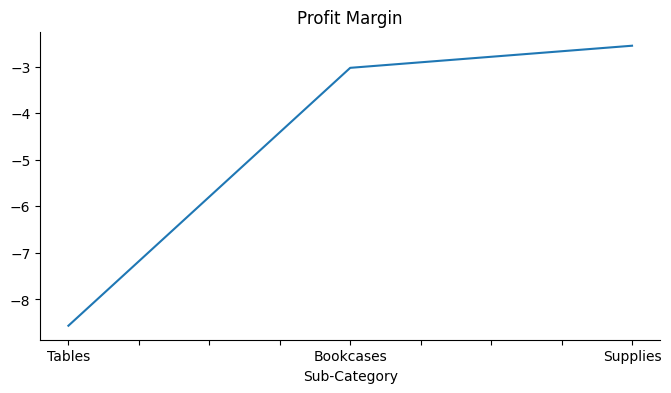

In [ ]:
# @title Profit Margin

from matplotlib import pyplot as plt
low_profit_high_sales['Profit Margin'].plot(kind='line', figsize=(8, 4), title='Profit Margin')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Are there any products that generate high profits with relatively low sales volume?

# Analyze products with high profit and low sales volume
# Calculate profit margin
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# Group by product (using 'Product Name') and calculate total sales, profit, and profit margin
product_analysis = df.groupby('Sub-Category').agg({'Sales': 'sum', 'Profit': 'sum', 'Profit Margin': 'mean', 'Quantity': 'sum'})

# Sort by profit margin in descending order, then by sales in ascending order
sorted_products = product_analysis.sort_values(by=['Profit Margin', 'Sales'], ascending=[False, True])


In [ ]:
sorted_products

,Sales,Profit,Profit Margin,Quantity
Sub-Category,,,,
Labels,12486.3120,5546.2540,42.966346,1400
Paper,78479.2060,34053.5693,42.560036,5178
Envelopes,16476.4020,6964.1767,42.313976,906
Copiers,149528.0300,55617.8249,31.719363,234
Fasteners,3024.2800,949.5182,29.917051,914
Art,27118.7920,6527.7870,25.164573,3000
Accessories,167380.3180,41936.6357,21.820968,2976
Furnishings,91705.1640,13059.1436,13.706635,3563
Phones,330007.0540,44515.7306,11.922197,3289


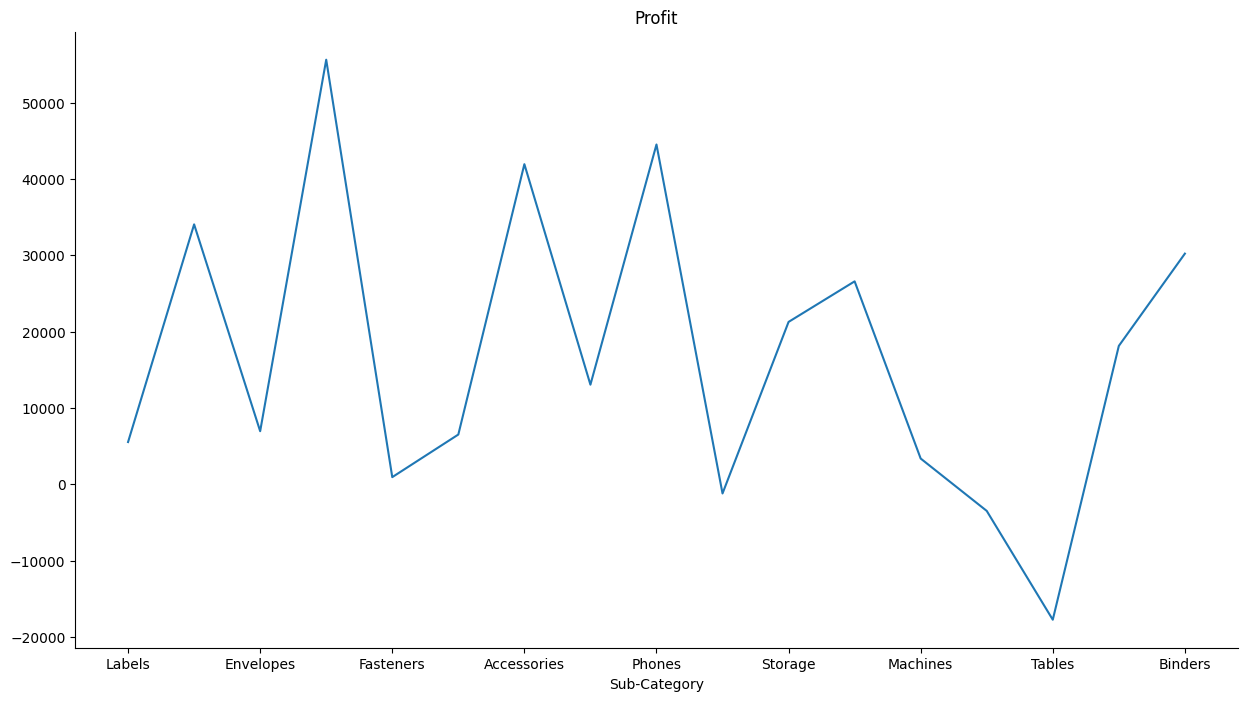

In [ ]:
# @title Profit

from matplotlib import pyplot as plt
sorted_products['Profit'].plot(kind='line', figsize=(15, 8), title='Profit')
plt.gca().spines[['top', 'right']].set_visible(False)

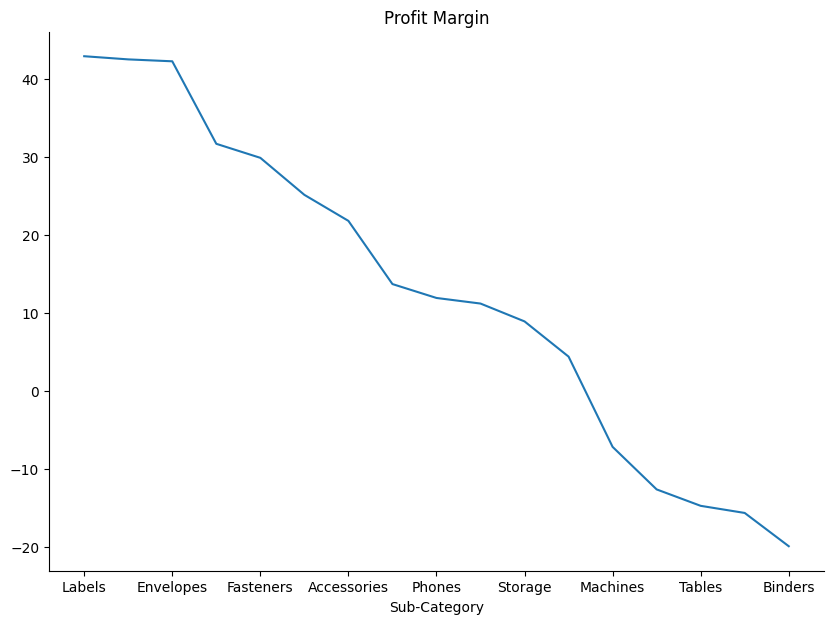

In [ ]:
# @title Profit Margin

from matplotlib import pyplot as plt
sorted_products['Profit Margin'].plot(kind='line', figsize=(10, 7), title='Profit Margin')
plt.gca().spines[['top', 'right']].set_visible(False)

A transaction typically refers to an individual sale or interaction with a customer where a product is purchased

In [ ]:
# What are the average sales and profit per transaction?
# Are there significant variations in profit across different transactions?

# Calculate the average sales and profit per transaction
average_sales_per_transaction = df['Sales'].mean()
average_profit_per_transaction = df['Profit'].mean()

print(f"Average Sales per Transaction: {average_sales_per_transaction}")
print(f"Average Profit per Transaction: {average_profit_per_transaction}")


# A higher standard deviation indicates higher variability, a lower standard deviation suggests the profit is more consistent.
# Analyze variations in profit across transactions
profit_std_dev = df['Profit'].std()
profit_variation_coefficient = profit_std_dev / average_profit_per_transaction

print(f"Standard Deviation of Profit: {profit_std_dev}")
print(f"Coefficient of Variation of Profit: {profit_variation_coefficient}")

# Interpretation of profit variation
if profit_variation_coefficient > 0.5:
    print("Significant variations in profit across different transactions.")
else:
    print("Profit variations across transactions are moderate or low.")


Average Sales per Transaction: 229.85800083049833
Average Profit per Transaction: 28.65689630778467
Standard Deviation of Profit: 234.26010769095757
Coefficient of Variation of Profit: 8.17465035902442
Significant variations in profit across different transactions.


data insights: